## Loading the libraries

In [ ]:
import pandas as pd  # Importing pandas library for data manipulation and analysis
import numpy as np  # Importing numpy library for numerical computing
import re  # Importing re module for regular expressions
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import datetime  # Importing datetime module for date and time manipulation
from datetime import datetime  # Importing datetime class from datetime module
import random  # Importing random module for generating random numbers
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot  # Importing plotly for interactive plots
import plotly.express as px  # Importing plotly express for easy plotting
import plotly.graph_objects as go  # Importing plotly graph objects for advanced plotting
import plotly.figure_factory as ff  # Importing plotly figure factory for creating complex visualizations
from plotly.colors import n_colors  # Importing plotly colors for color management
import seaborn as sns  # Importing seaborn for statistical data visualization
from plotly.subplots import make_subplots  # Importing plotly subplots for creating multiple plots
from collections import Counter  # Importing Counter for counting hashable objects
init_notebook_mode(connected=True)  # Initializing plotly notebook mode for offline plotting
from wordcloud import WordCloud , ImageColorGenerator  # Importing wordcloud for creating word clouds
import nltk as nltk  # Importing nltk for natural language processing tasks
import string  # Importing string module for string manipulation
import re  # For regular expressions
import string  # For string operations
import contractions  # For expanding contractions
from nltk.corpus import stopwords  # For accessing stopwords list
from nltk.tokenize import word_tokenize  # Importing word_tokenize for tokenization
from nltk.corpus import stopwords  # Importing stopwords for removing common words
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer for text feature extraction
from textblob import TextBlob  # Importing TextBlob for sentiment analysis
from nltk.corpus import stopwords  # Importing stopwords again (duplicate import)
from textblob import TextBlob  # Importing TextBlob again (duplicate import)
import emoji  # Importing emoji for working with emojis
import contractions  # Importing contractions for expanding contractions in text
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer  # Importing stemmers and lemmatizer for word normalization
from collections import Counter  # Importing Counter again (duplicate import)
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into train and test sets
from xgboost import XGBClassifier  # Importing XGBoost classifier
from sklearn.metrics import accuracy_score, classification_report  # Importing accuracy_score and classification_report for model evaluation

## Loading the Machine learing Libraries

In [ ]:
# Libraries required for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, f1_score, auc
import matplotlib.pyplot as plt
import pandas as pd
import shap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay,confusion_matrix

# Appliances

## Reading in the saved files and recreating the modeling dataset

In [ ]:
# Complete filtered, cleaned and sampled data
appliances_filter_sample_clean_df = pd.read_csv('Appliances data and pickles/Appliances_Modeling_2.csv')
appliances_filter_sample_clean_df.shape

(49995, 35)

In [ ]:
# Features data
appliances_features_x = pd.read_csv('Appliances data and pickles/Appliances_Modeling.csv')
appliances_features_x.shape

(49995, 1008)

In [ ]:
# Defining the columns to be taken in modeling dataset
target_column = 'helpfulness_binary'  # Helpfulness is binary (1 or 0)

# Combining features and target variable into 1 modeling file
appliances_modeling_df = pd.concat([appliances_features_x, appliances_filter_sample_clean_df[target_column]], axis = 1)

## Data split into train, test and validation for modeling

In [ ]:
# Separating features (X) and target variable (y)
X_app = appliances_features_x
y_app = appliances_modeling_df['helpfulness_binary']

# Step 1: Splitting the data into training (70%) and temporary data (30%)
X_train_app, X_temp_app, y_train_app, y_temp_app = train_test_split(X_app, y_app, test_size=0.3, random_state=123)

# Step 2: Splitting the temporary data into testing (50%) and validation (50%)
X_test_app, X_validation_app, y_test_app, y_validation_app = train_test_split(X_temp_app, y_temp_app, test_size=0.5, random_state=123)


In [ ]:
del appliances_features_x
del appliances_modeling_df
del X_train_app
del y_train_app
del X_temp_app
del y_temp_app
del X_validation_app
del y_validation_app

## Loading the saved modeling pickle files

In [ ]:
import pickle
# Function to load pickle model files
def load_model_pickle(pickle_filename):
    with open(pickle_filename, 'rb') as file:
        loaded_model = pickle.load(file)
    print(f"Model loaded from {pickle_filename}")
    return loaded_model

In [ ]:
# XGBoost - base and tuned models
xgb_base_classifier_appliances = load_model_pickle('Appliances data and pickles/xgb_base_classifier_appliances.pkl')
xgb_tuned_classifier_appliances = load_model_pickle('Appliances data and pickles/xgb_tuned_classifier_appliances.pkl')

Model loaded from Appliances data and pickles/xgb_base_classifier_appliances.pkl
Model loaded from Appliances data and pickles/xgb_tuned_classifier_appliances.pkl


In [ ]:
# Logistic regression - base and tuned models
lr_base_classifier_appliances = load_model_pickle('Appliances data and pickles/lr_base_classifier_appliances.pkl')
lr_tuned_classifier_appliances = load_model_pickle('Appliances data and pickles/lr_tuned_classifier_appliances.pkl')

Model loaded from Appliances data and pickles/lr_base_classifier_appliances.pkl
Model loaded from Appliances data and pickles/lr_tuned_classifier_appliances.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
# Random Forest - base and tuned models
rf_base_classifier_appliances = load_model_pickle('Appliances data and pickles/rf_base_classifier_appliances.pkl')
rf_tuned_classifier_appliances = load_model_pickle('Appliances data and pickles/rf_tuned_classifier_appliances.pkl')

Model loaded from Appliances data and pickles/rf_base_classifier_appliances.pkl
Model loaded from Appliances data and pickles/rf_tuned_classifier_appliances.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
# SVM - base and tuned models
svm_base_classifier_appliances = load_model_pickle('Appliances data and pickles/svm_base_classifier_appliances.pkl')
svm_tuned_classifier_appliances = load_model_pickle('Appliances data and pickles/svm_tuned_classifier_appliances.pkl')

Model loaded from Appliances data and pickles/svm_base_classifier_appliances.pkl
Model loaded from Appliances data and pickles/svm_tuned_classifier_appliances.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator SVC from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



# Automotive

## Reading in the saved files and recreating the modeling dataset

In [ ]:
# Complete filtered, cleaned and sampled data
automotive_filter_sample_clean_df = pd.read_csv('Automotive data and pickles/Automotive_Modeling_2.csv')
automotive_filter_sample_clean_df.shape

(50002, 35)

In [ ]:
# Features data
automotive_features_x = pd.read_csv('Automotive data and pickles/Automotive_Modeling.csv')
automotive_features_x.shape

(50002, 1008)

In [ ]:
# Defining the columns to be taken in modeling dataset
target_column = 'helpfulness_binary'  # Helpfulness is binary (1 or 0)

# Combining features and target variable into 1 modeling file
automotive_modeling_df = pd.concat([automotive_features_x, automotive_filter_sample_clean_df[target_column]], axis = 1)

## Data split into train, test and validation for modeling

In [ ]:
# Separating features (X) and target variable (y)
X_auto = automotive_features_x
y_auto = automotive_modeling_df['helpfulness_binary']

# Step 1: Splitting the data into training (70%) and temporary data (30%)
X_train_auto, X_temp_auto, y_train_auto, y_temp_auto = train_test_split(X_auto, y_auto, test_size=0.3, random_state=123)

# Step 2: Splitting the temporary data into testing (50%) and validation (50%)
X_test_auto, X_validation_auto, y_test_auto, y_validation_auto = train_test_split(X_temp_auto, y_temp_auto,
                                                                                  test_size=0.5, random_state=123)


In [ ]:
del automotive_features_x
del automotive_modeling_df
del X_train_auto
del y_train_auto
del X_temp_auto
del y_temp_auto
del X_validation_auto
del y_validation_auto

## Loading the saved modeling pickle files

In [ ]:
# XGBoost - base and tuned models
xgb_base_classifier_automotive = load_model_pickle('Automotive data and pickles/xgb_base_classifier_automotive.pkl')
xgb_tuned_classifier_automotive = load_model_pickle('Automotive data and pickles/xgb_tuned_classifier_automotive.pkl')

Model loaded from Automotive data and pickles/xgb_base_classifier_automotive.pkl
Model loaded from Automotive data and pickles/xgb_tuned_classifier_automotive.pkl


In [ ]:
# Logistic regression - base and tuned models
lr_base_classifier_automotive = load_model_pickle('Automotive data and pickles/lr_base_classifier_automotive.pkl')
lr_tuned_classifier_automotive = load_model_pickle('Automotive data and pickles/lr_tuned_classifier_automotive.pkl')

Model loaded from Automotive data and pickles/lr_base_classifier_automotive.pkl
Model loaded from Automotive data and pickles/lr_tuned_classifier_automotive.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
# Random Forest - base and tuned models
rf_base_classifier_automotive = load_model_pickle('Automotive data and pickles/rf_base_classifier_automotive.pkl')
rf_tuned_classifier_automotive = load_model_pickle('Automotive data and pickles/rf_tuned_classifier_automotive.pkl')

Model loaded from Automotive data and pickles/rf_base_classifier_automotive.pkl
Model loaded from Automotive data and pickles/rf_tuned_classifier_automotive.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
# SVM - base and tuned models
svm_base_classifier_automotive = load_model_pickle('Automotive data and pickles/svm_base_classifier_automotive.pkl')
svm_tuned_classifier_automotive = load_model_pickle('Automotive data and pickles/svm_tuned_classifier_automotive.pkl')

Model loaded from Automotive data and pickles/svm_base_classifier_automotive.pkl
Model loaded from Automotive data and pickles/svm_tuned_classifier_automotive.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator SVC from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



# Cellphone and accessories

## Reading in the saved files and recreating the modeling dataset

In [ ]:
# Complete filtered, cleaned and sampled data
cell_filter_sample_clean_df = pd.read_csv('Cellphone data and pickles/cellphone_Modeling_2.csv')
cell_filter_sample_clean_df.shape

(50006, 35)

In [ ]:
# Features data
cell_features_x = pd.read_csv('Cellphone data and pickles/cellphone_Modeling.csv')
cell_features_x.shape

(50006, 1008)

In [ ]:
# Defining the columns to be taken in modeling dataset
target_column = 'helpfulness_binary'  # Helpfulness is binary (1 or 0)

# Combining features and target variable into 1 modeling file
cell_modeling_df = pd.concat([cell_features_x, cell_filter_sample_clean_df[target_column]], axis = 1)

## Data split into train, test and validation for modeling

In [ ]:
# Separating features (X) and target variable (y)
X_cell = cell_features_x
y_cell = cell_modeling_df['helpfulness_binary']

# Step 1: Splitting the data into training (70%) and temporary data (30%)
X_train_cell, X_temp_cell, y_train_cell, y_temp_cell = train_test_split(X_cell, y_cell, test_size=0.3, random_state=123)

# Step 2: Splitting the temporary data into testing (50%) and validation (50%)
X_test_cell, X_validation_cell, y_test_cell, y_validation_cell = train_test_split(X_temp_cell, y_temp_cell,
                                                                                  test_size=0.5, random_state=123)

In [ ]:
del cell_features_x
del cell_modeling_df
del X_train_cell
del y_train_cell
del X_temp_cell
del y_temp_cell
del X_validation_cell
del y_validation_cell

## Loading the saved modeling pickle files

In [ ]:
# XGBoost - base and tuned models
xgb_base_classifier_cell = load_model_pickle('Cellphone data and pickles/xgb_base_classifier_cellphones.pkl')
xgb_tuned_classifier_cell = load_model_pickle('Cellphone data and pickles/xgb_tuned_classifier_cellphones.pkl')

Model loaded from Cellphone data and pickles/xgb_base_classifier_cellphones.pkl
Model loaded from Cellphone data and pickles/xgb_tuned_classifier_cellphones.pkl


In [ ]:
# Logistic regression - base and tuned models
lr_base_classifier_cell = load_model_pickle('Cellphone data and pickles/lr_base_classifier_cellphones.pkl')
lr_tuned_classifier_cell = load_model_pickle('Cellphone data and pickles/lr_tuned_classifier_cellphones.pkl')

Model loaded from Cellphone data and pickles/lr_base_classifier_cellphones.pkl
Model loaded from Cellphone data and pickles/lr_tuned_classifier_cellphones.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
# Random Forest - base and tuned models
rf_base_classifier_cell = load_model_pickle('Cellphone data and pickles/rf_base_classifier_cellphones.pkl')
rf_tuned_classifier_cell = load_model_pickle('Cellphone data and pickles/rf_tuned_classifier_cellphones.pkl')

Model loaded from Cellphone data and pickles/rf_base_classifier_cellphones.pkl
Model loaded from Cellphone data and pickles/rf_tuned_classifier_cellphones.pkl


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
# SVM - base and tuned models
svm_base_classifier_cell = load_model_pickle('Cellphone data and pickles/svm_base_classifier_cellphones.pkl')
svm_tuned_classifier_cell = load_model_pickle('Cellphone data and pickles/svm_tuned_classifier_cellphones.pkl')

/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator SVC from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



Model loaded from Cellphone data and pickles/svm_base_classifier_cellphones.pkl
Model loaded from Cellphone data and pickles/svm_tuned_classifier_cellphones.pkl


# Tools

## Reading in the saved files and recreating the modeling dataset

In [ ]:
# Complete filtered, cleaned and sampled data
tools_filter_sample_clean_df = pd.read_csv('Tools data and pickles/Tools_Modeling_2.csv')
tools_filter_sample_clean_df.shape

(49996, 35)

In [ ]:
# Features data
tools_features_x = pd.read_csv('Tools data and pickles/Tools_Modeling.csv')
tools_features_x.shape

(49996, 1008)

In [ ]:
# Defining the columns to be taken in modeling dataset
target_column = 'helpfulness_binary'  # Helpfulness is binary (1 or 0)

# Combining features and target variable into 1 modeling file
tools_modeling_df = pd.concat([tools_features_x, tools_filter_sample_clean_df[target_column]], axis = 1)

## Data split into train, test and validation for modeling

In [ ]:
# Separating features (X) and target variable (y)
X_tools = tools_features_x
y_tools = tools_modeling_df['helpfulness_binary']

# Step 1: Splitting the data into training (70%) and temporary data (30%)
X_train_tools, X_temp_tools, y_train_tools, y_temp_tools = train_test_split(X_tools, y_tools, test_size=0.3, random_state=123)

# Step 2: Splitting the temporary data into testing (50%) and validation (50%)
X_test_tools, X_validation_tools, y_test_tools, y_validation_tools = train_test_split(X_temp_tools, y_temp_tools,
                                                                                  test_size=0.5, random_state=123)

In [ ]:
del tools_features_x
del tools_modeling_df
del X_train_tools
del y_train_tools
del X_temp_tools
del y_temp_tools
del X_validation_tools
del y_validation_tools

## Loading the saved modeling pickle files

In [ ]:
# XGBoost - base and tuned models
xgb_base_classifier_tools = load_model_pickle('Tools data and pickles/xgb_base_classifier_tools.pkl')
xgb_tuned_classifier_tools = load_model_pickle('Tools data and pickles/xgb_tuned_classifier_tools.pkl')

Model loaded from Tools data and pickles/xgb_base_classifier_tools.pkl
Model loaded from Tools data and pickles/xgb_tuned_classifier_tools.pkl


In [ ]:
# Logistic regression - base and tuned models
lr_base_classifier_tools = load_model_pickle('Tools data and pickles/lr_base_classifier_tools.pkl')
lr_tuned_classifier_tools = load_model_pickle('Tools data and pickles/lr_tuned_classifier_tools.pkl')

Model loaded from Tools data and pickles/lr_base_classifier_tools.pkl
Model loaded from Tools data and pickles/lr_tuned_classifier_tools.pkl


In [ ]:
# Random Forest - base and tuned models
rf_base_classifier_tools = load_model_pickle('Tools data and pickles/rf_base_classifier_tools.pkl')
rf_tuned_classifier_tools = load_model_pickle('Tools data and pickles/rf_tuned_classifier_tools.pkl')

Model loaded from Tools data and pickles/rf_base_classifier_tools.pkl
Model loaded from Tools data and pickles/rf_tuned_classifier_tools.pkl


In [ ]:
# SVM - base and tuned models
svm_base_classifier_tools = load_model_pickle('Tools data and pickles/svm_base_classifier_tools.pkl')
svm_tuned_classifier_tools = load_model_pickle('Tools data and pickles/svm_tuned_classifier_tools.pkl')

Model loaded from Tools data and pickles/svm_base_classifier_tools.pkl
Model loaded from Tools data and pickles/svm_tuned_classifier_tools.pkl


## Running the models on test data and getting evaluation metrics

In [ ]:
# Function to evaluate multiple models using ROC curve with AUC being displayed on chart
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(ax, fpr, tpr, model_name):
    ax.plot(fpr, tpr, label=model_name)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}')
    ax.legend()
    ax.grid(True)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Add AUC value as text annotation
    ax.text(0.7, 0.2, f'AUC = {roc_auc:.2f}', bbox=dict(facecolor='white', alpha=0.5), fontsize=10)

def evaluate_models_with_roc(models, datasets):
    num_models = len(models)
    ncols = 2  # 2 columns, can change as required
    nrows = -(-num_models // ncols)  # Ceiling division to calculate number of rows

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6 * nrows))

    for idx, (model_name, model) in enumerate(models.items()):
        row = idx // ncols
        col = idx % ncols

        X_test, y_test = datasets[model_name]
        #y_pred = model.predict_proba(X_test)[:, 1]  # Can use predict_proba method in case of probabilities
        y_pred = model.predict(X_test)  # Directly using the predict method
        fpr, tpr, _ = roc_curve(y_test, y_pred)

        if nrows > 1:
            plot_roc_curve(axes[row, col], fpr, tpr, model_name)
        else:
            plot_roc_curve(axes[col], fpr, tpr, model_name)

    plt.tight_layout()
    plt.show()

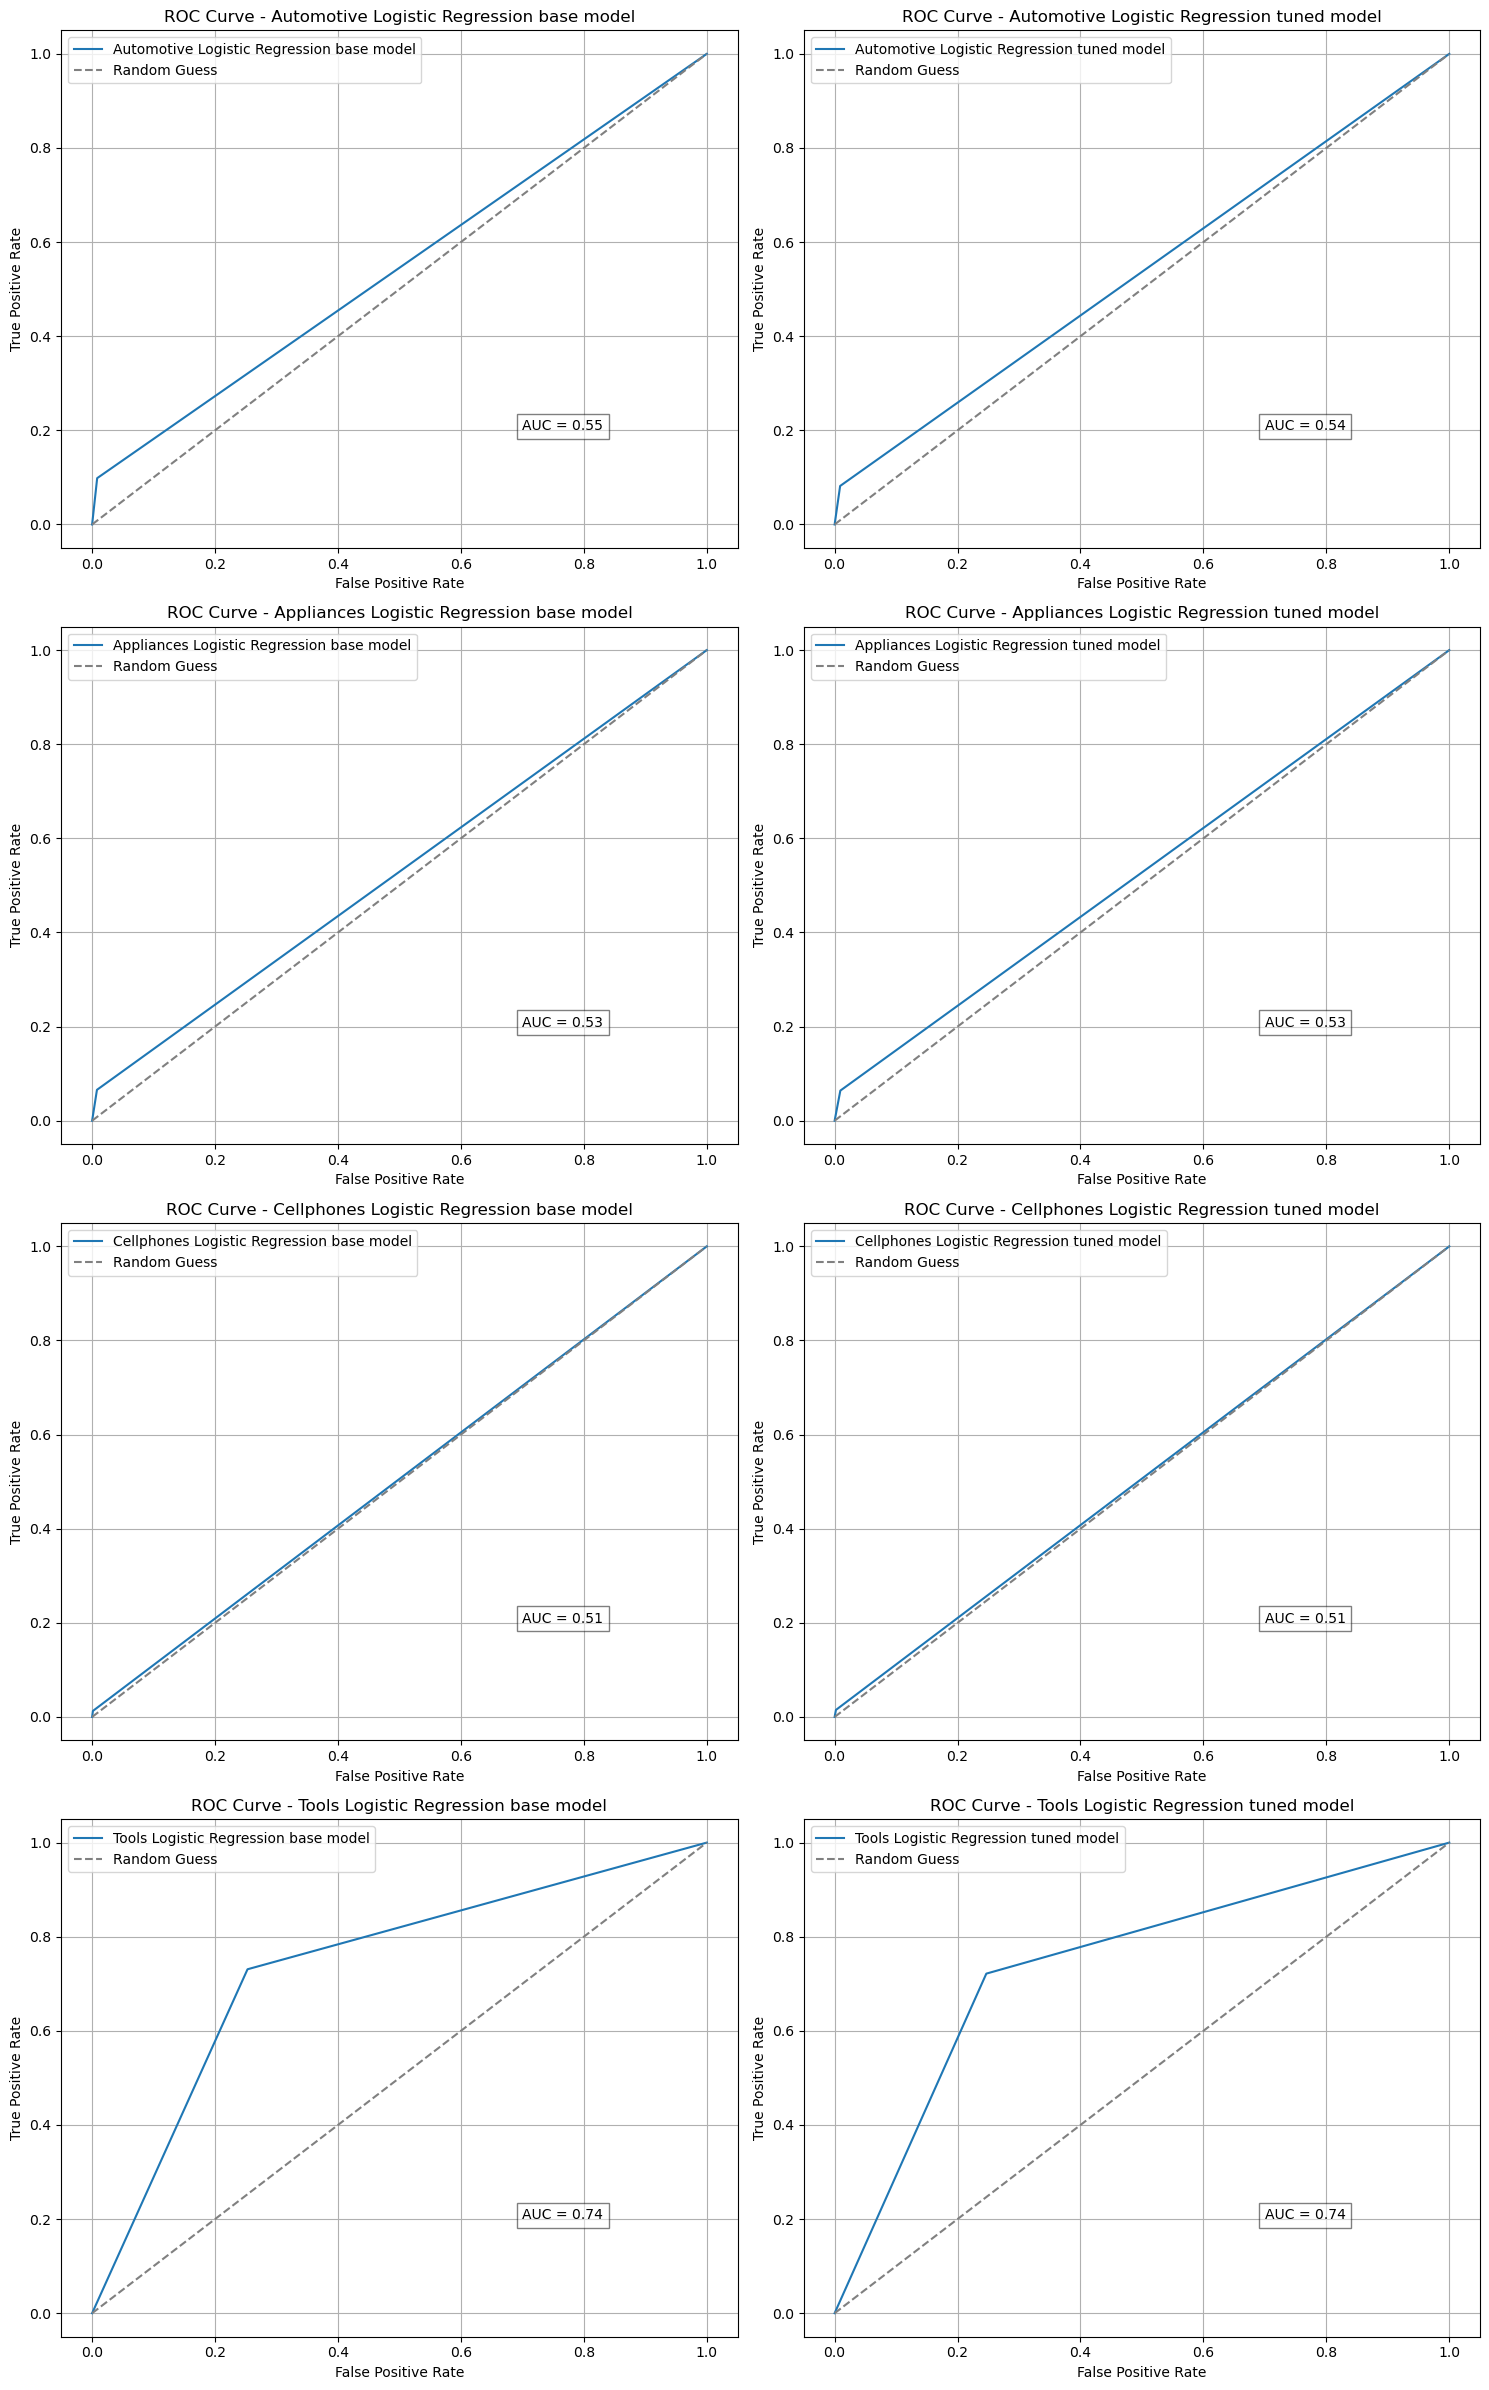

In [ ]:
# Defining dictionaries for logistic regression
models_lr = {
    "Automotive Logistic Regression base model": lr_base_classifier_automotive,
    "Automotive Logistic Regression tuned model": lr_tuned_classifier_automotive,
    "Appliances Logistic Regression base model": lr_base_classifier_appliances,
    "Appliances Logistic Regression tuned model": lr_tuned_classifier_appliances,
    "Cellphones Logistic Regression base model": lr_base_classifier_cell,
    "Cellphones Logistic Regression tuned model": lr_tuned_classifier_cell,
    "Tools Logistic Regression base model": lr_base_classifier_tools,
    "Tools Logistic Regression tuned model": lr_tuned_classifier_tools,

}

datasets_lr = {
    "Automotive Logistic Regression base model": (X_test_auto, y_test_auto),
    "Automotive Logistic Regression tuned model": (X_test_auto, y_test_auto),
    "Appliances Logistic Regression base model": (X_test_app, y_test_app),
    "Appliances Logistic Regression tuned model": (X_test_app, y_test_app),
    "Cellphones Logistic Regression base model": (X_test_cell, y_test_cell),
    "Cellphones Logistic Regression tuned model": (X_test_cell, y_test_cell),
    "Tools Logistic Regression base model": (X_test_tools, y_test_tools),
    "Tools Logistic Regression tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for Logistic Regression
evaluate_models_with_roc(models_lr, datasets_lr)

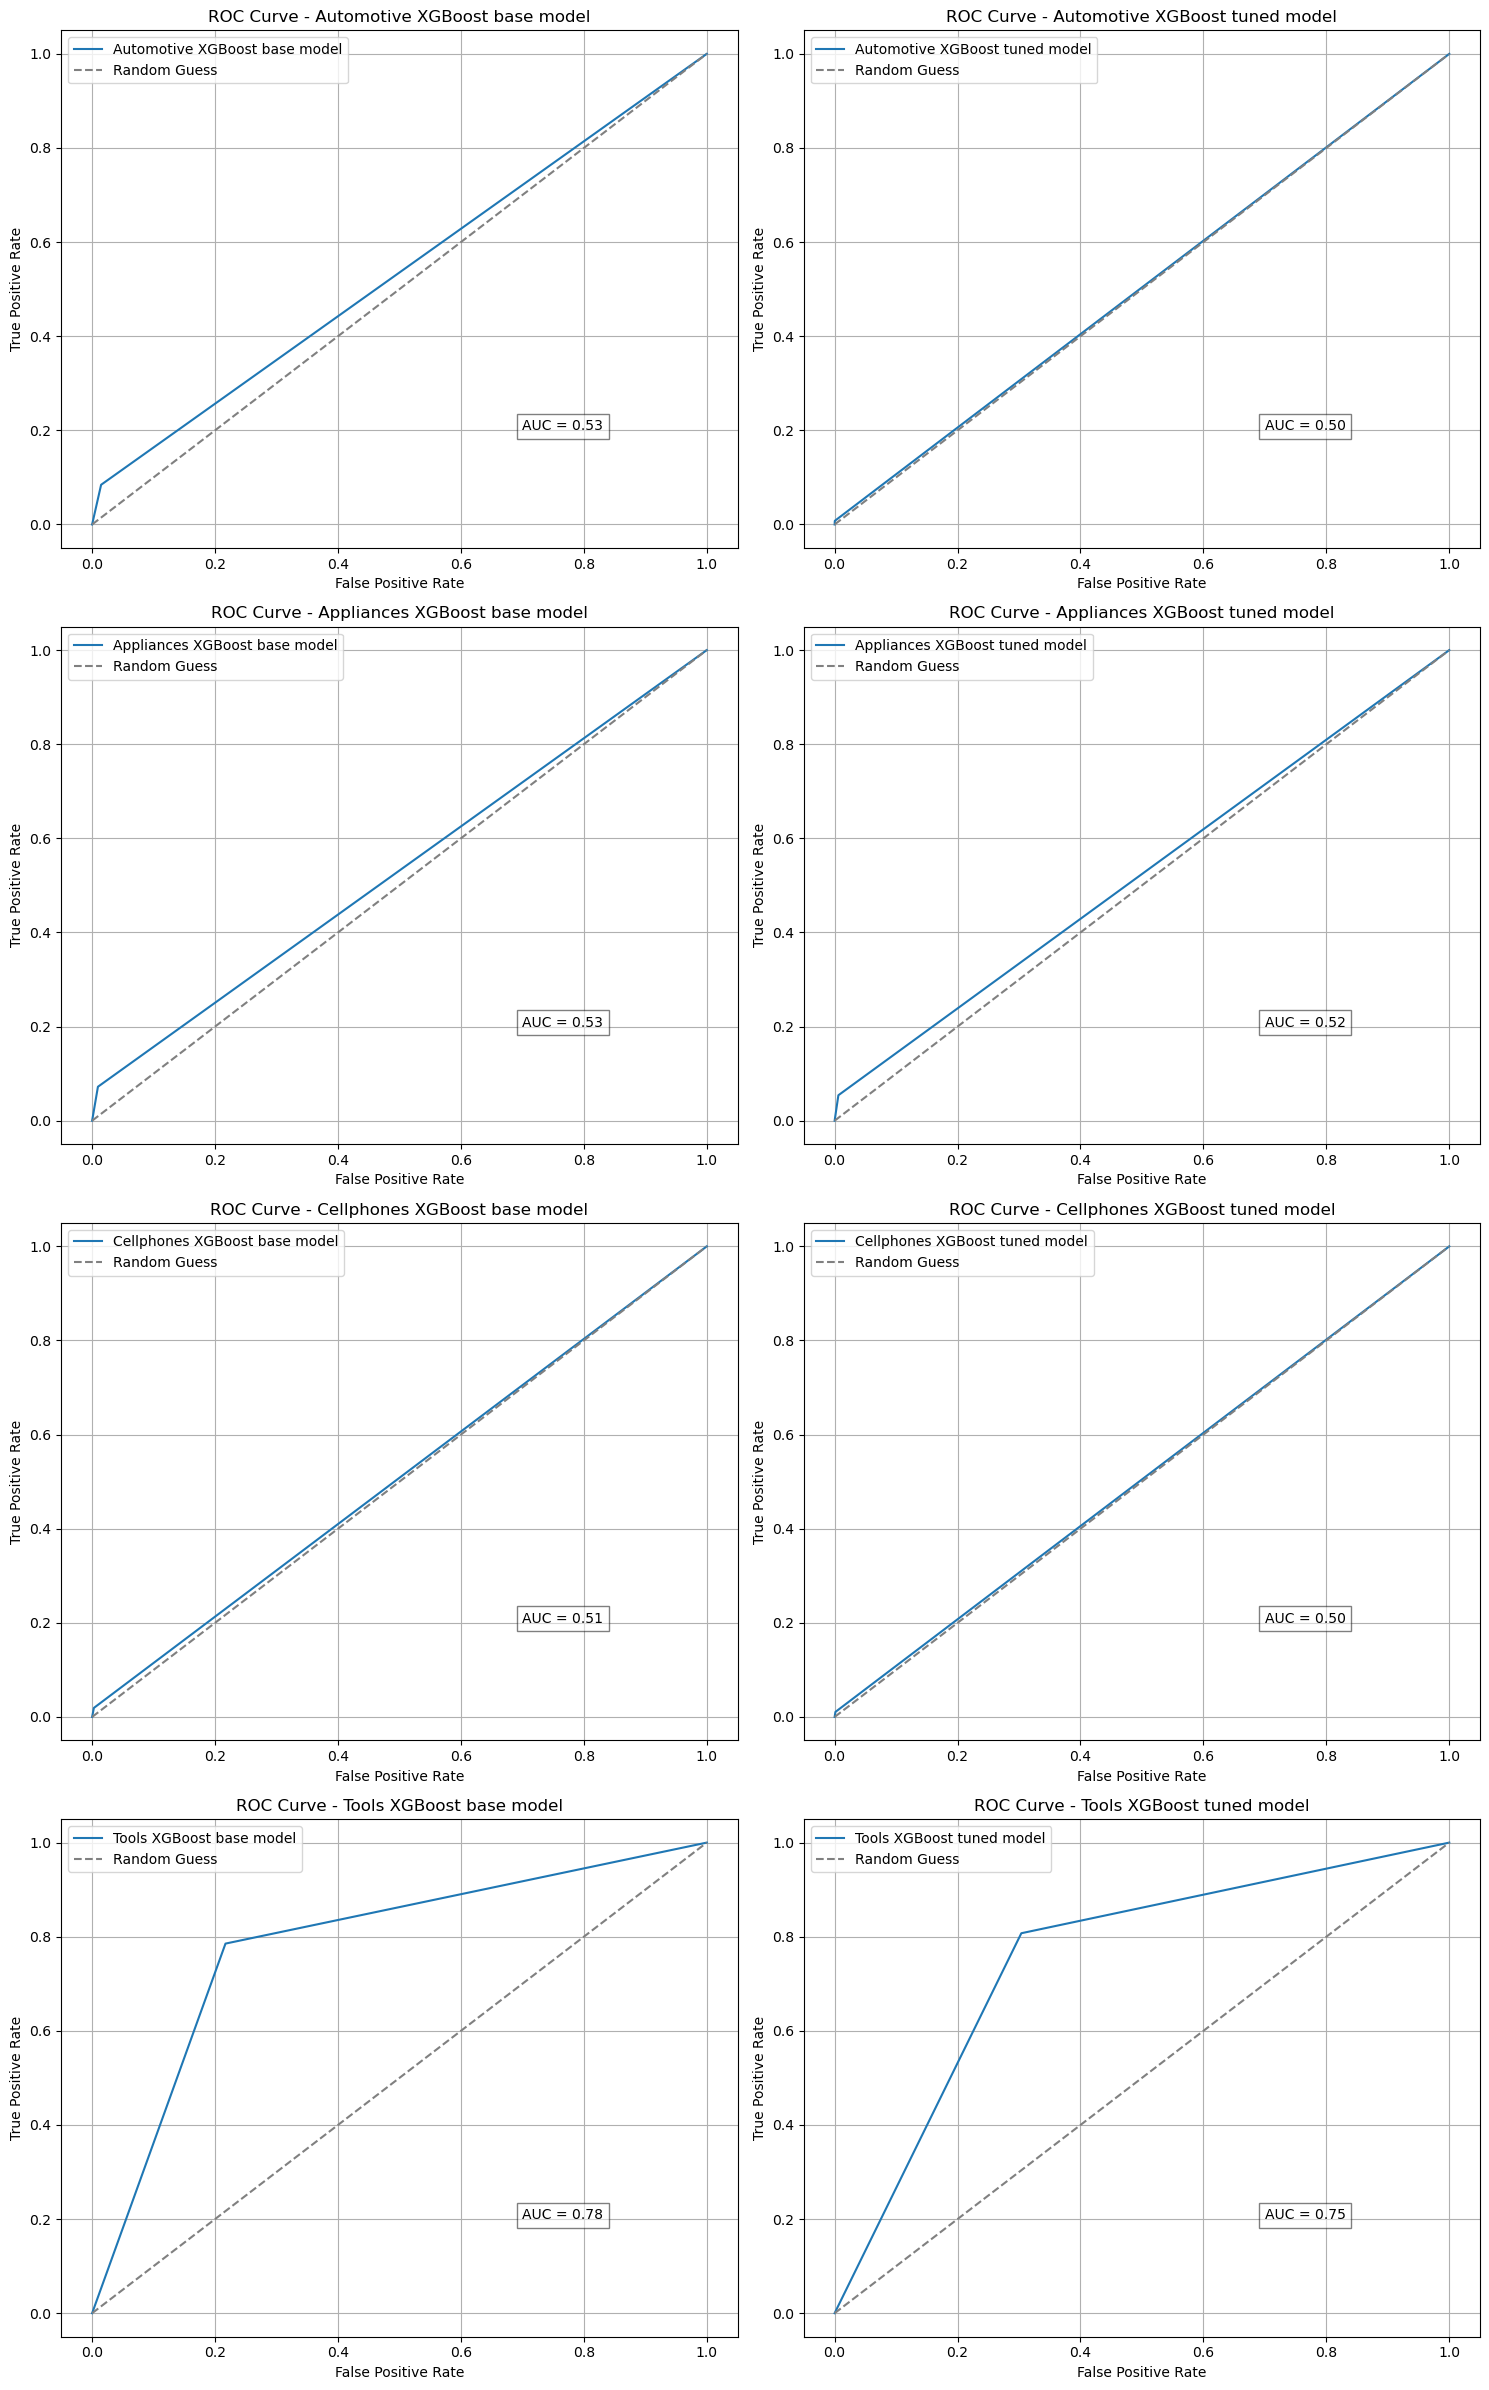

In [ ]:
# Defining dictionaries for XGBoost
models_xgb = {
    "Automotive XGBoost base model": xgb_base_classifier_automotive,
    "Automotive XGBoost tuned model": xgb_tuned_classifier_automotive,
    "Appliances XGBoost base model": xgb_base_classifier_appliances,
    "Appliances XGBoost tuned model": xgb_tuned_classifier_appliances,
    "Cellphones XGBoost base model": xgb_base_classifier_cell,
    "Cellphones XGBoost tuned model": xgb_tuned_classifier_cell,
    "Tools XGBoost base model": xgb_base_classifier_tools,
    "Tools XGBoost tuned model": xgb_tuned_classifier_tools,

}

datasets_xgb = {
    "Automotive XGBoost base model": (X_test_auto, y_test_auto),
    "Automotive XGBoost tuned model": (X_test_auto, y_test_auto),
    "Appliances XGBoost base model": (X_test_app, y_test_app),
    "Appliances XGBoost tuned model": (X_test_app, y_test_app),
    "Cellphones XGBoost base model": (X_test_cell, y_test_cell),
    "Cellphones XGBoost tuned model": (X_test_cell, y_test_cell),
    "Tools XGBoost base model": (X_test_tools, y_test_tools),
    "Tools XGBoost tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for XGBoost
evaluate_models_with_roc(models_xgb, datasets_xgb)

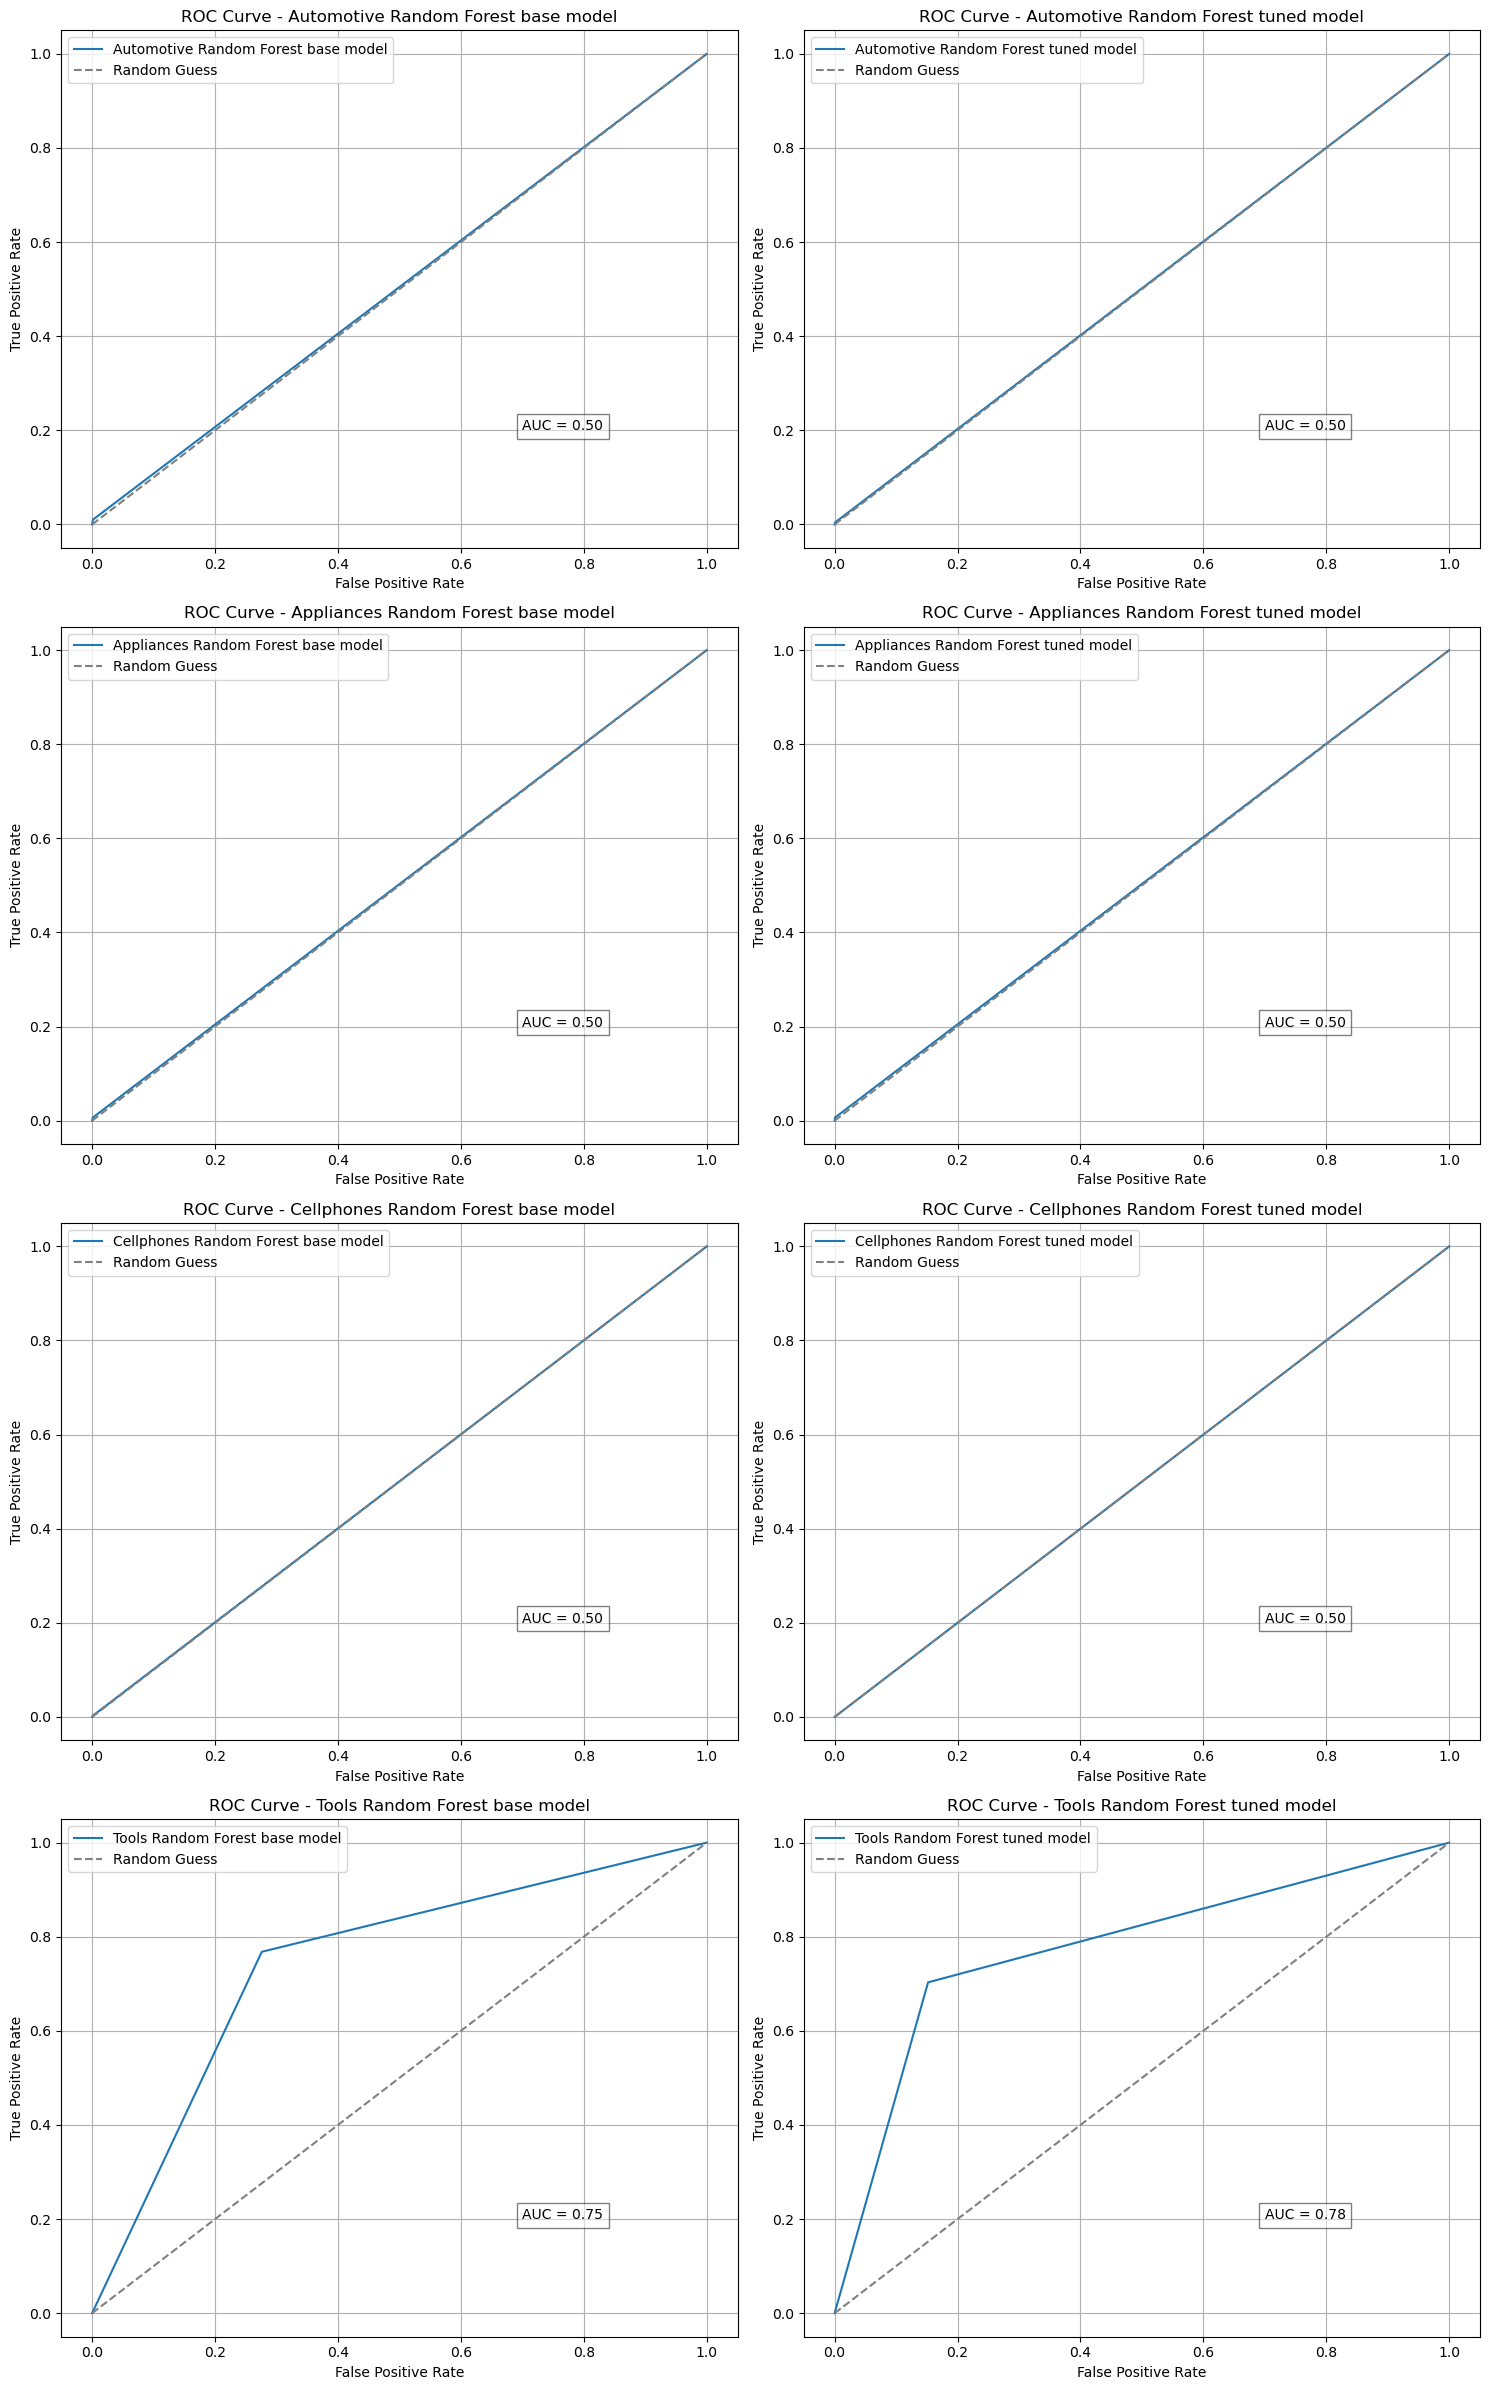

In [ ]:
# Defining dictionaries for Random Forest
models_rf = {
    "Automotive Random Forest base model": rf_base_classifier_automotive,
    "Automotive Random Forest tuned model": rf_tuned_classifier_automotive,
    "Appliances Random Forest base model": rf_base_classifier_appliances,
    "Appliances Random Forest tuned model": rf_tuned_classifier_appliances,
    "Cellphones Random Forest base model": rf_base_classifier_cell,
    "Cellphones Random Forest tuned model": rf_tuned_classifier_cell,
    "Tools Random Forest base model": rf_base_classifier_tools,
    "Tools Random Forest tuned model": rf_tuned_classifier_tools,

}

datasets_rf = {
    "Automotive Random Forest base model": (X_test_auto, y_test_auto),
    "Automotive Random Forest tuned model": (X_test_auto, y_test_auto),
    "Appliances Random Forest base model": (X_test_app, y_test_app),
    "Appliances Random Forest tuned model": (X_test_app, y_test_app),
    "Cellphones Random Forest base model": (X_test_cell, y_test_cell),
    "Cellphones Random Forest tuned model": (X_test_cell, y_test_cell),
    "Tools Random Forest base model": (X_test_tools, y_test_tools),
    "Tools Random Forest tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for Random Forest
evaluate_models_with_roc(models_rf, datasets_rf)

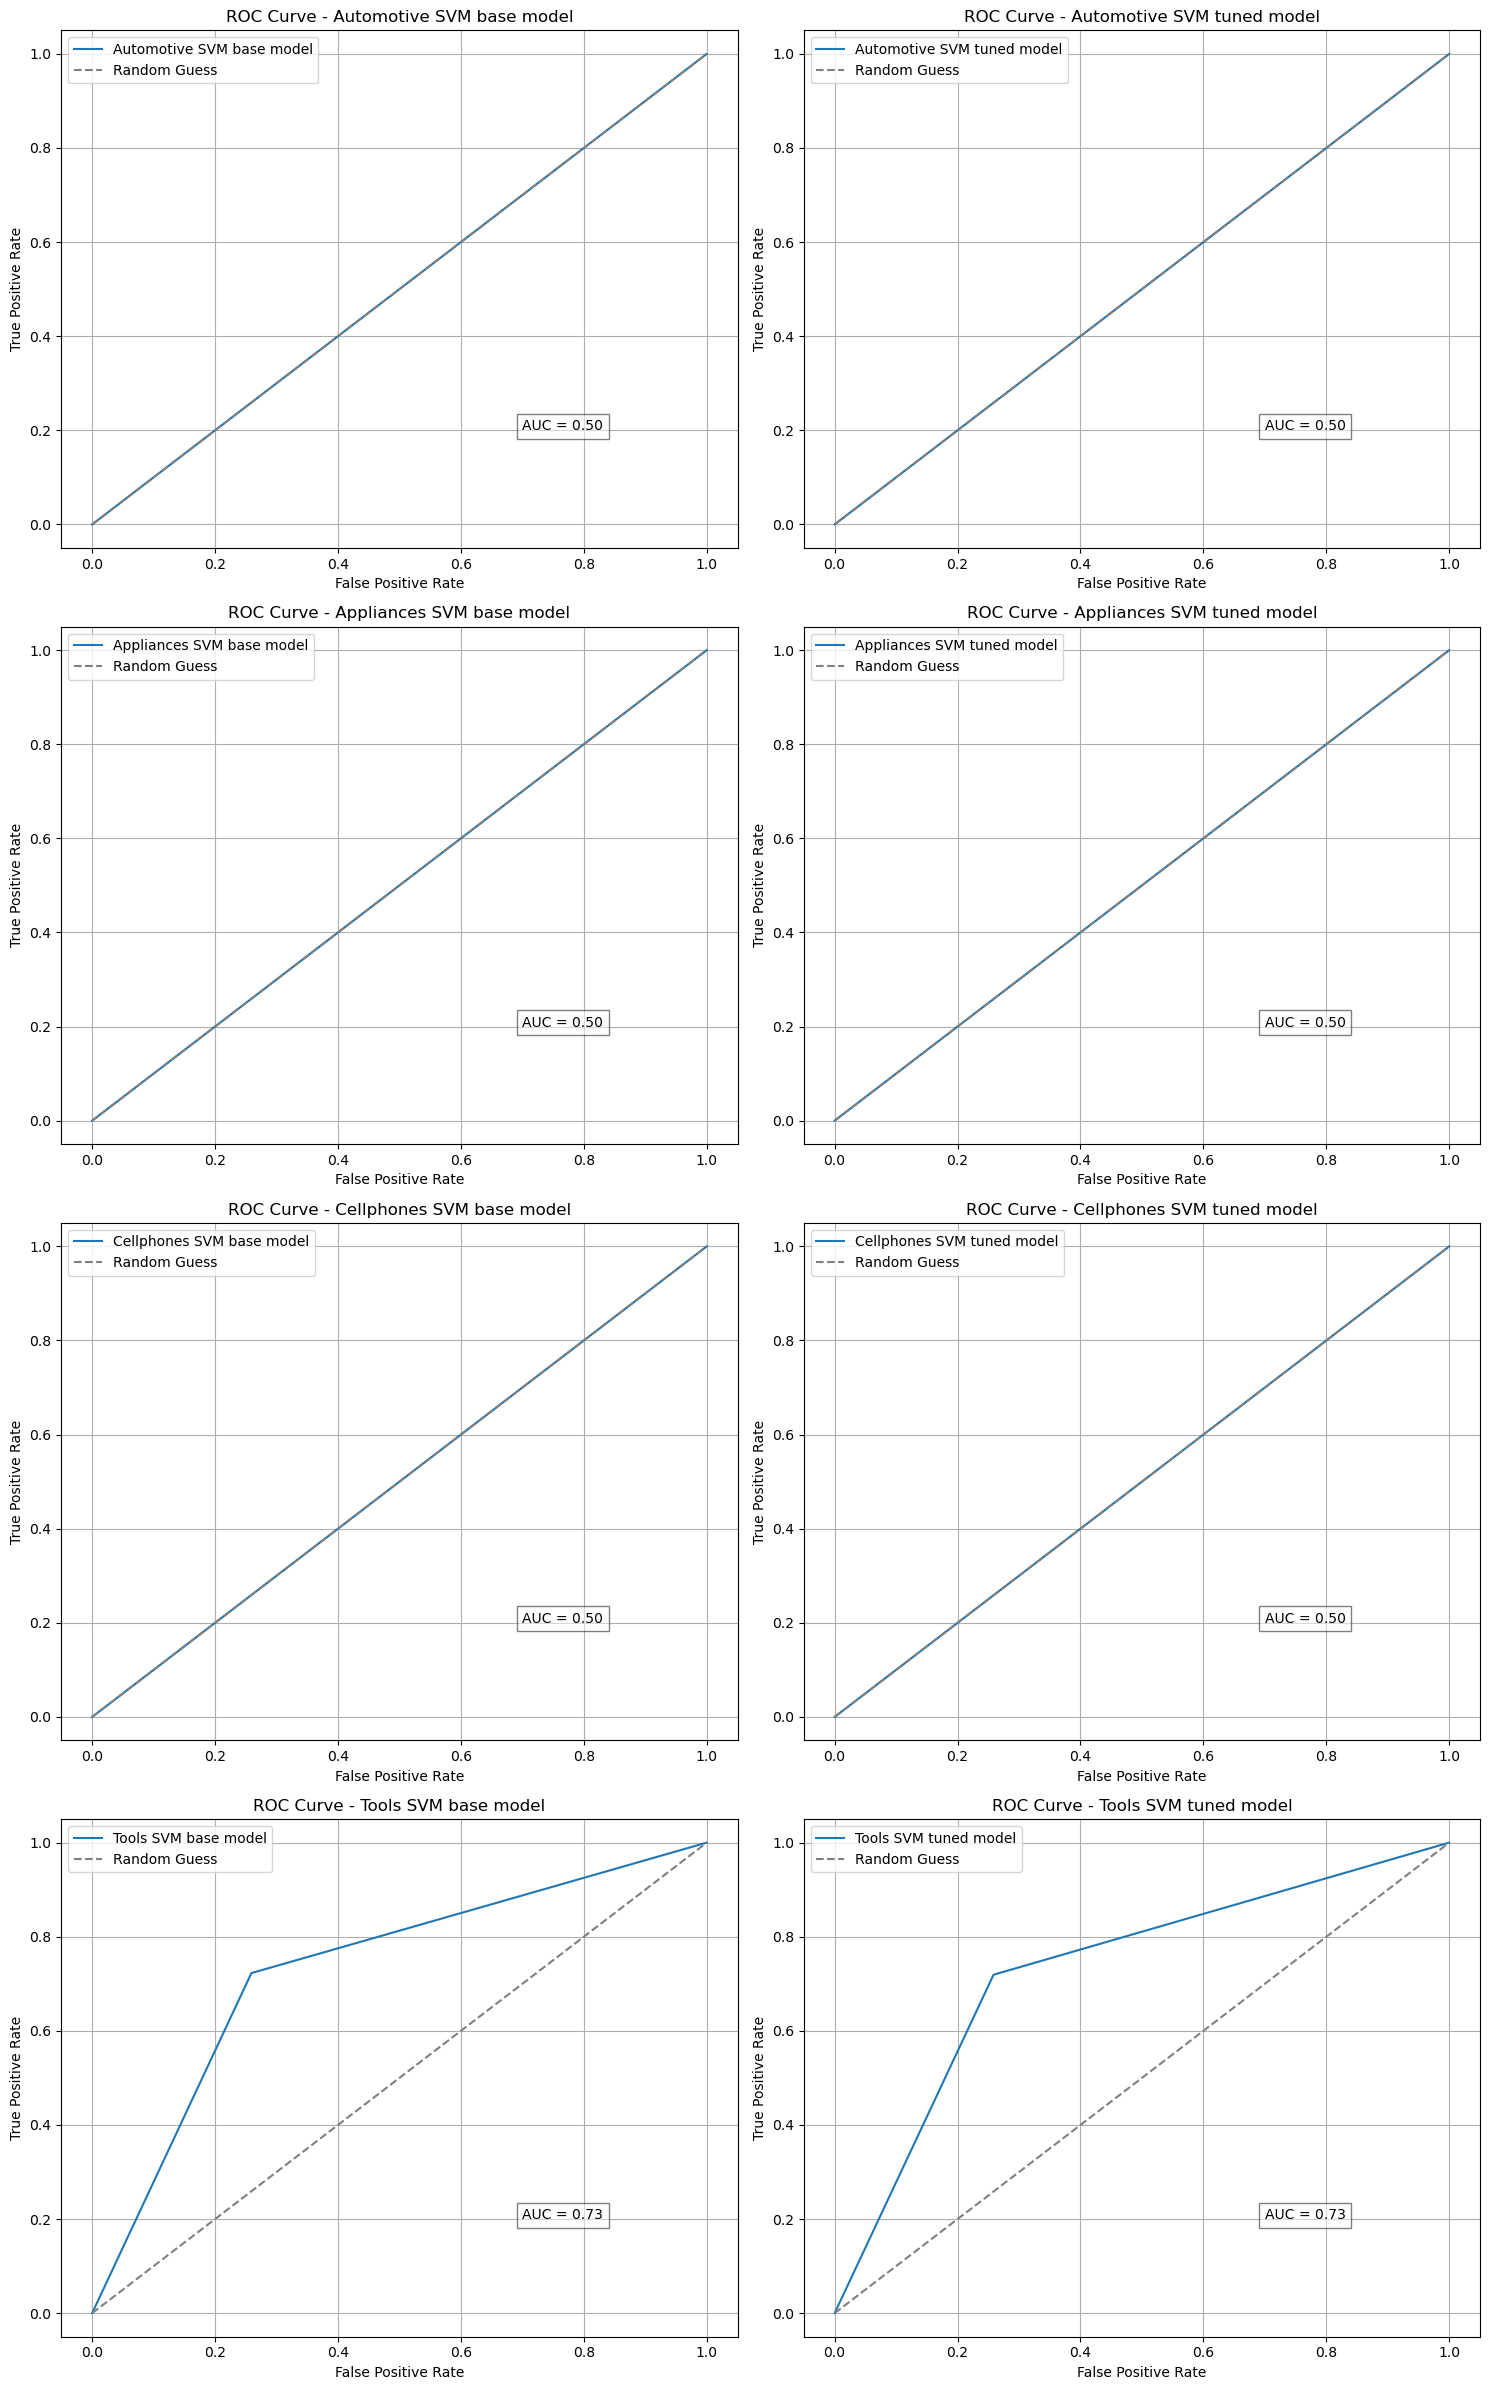

In [ ]:
# Defining dictionaries for SVM
models_svm = {
    "Automotive SVM base model": svm_base_classifier_automotive,
    "Automotive SVM tuned model": svm_tuned_classifier_automotive,
    "Appliances SVM base model": svm_base_classifier_appliances,
    "Appliances SVM tuned model": svm_tuned_classifier_appliances,
    "Cellphones SVM base model": svm_base_classifier_cell,
    "Cellphones SVM tuned model": svm_tuned_classifier_cell,
    "Tools SVM base model": svm_base_classifier_tools,
    "Tools SVM tuned model": svm_tuned_classifier_tools,

}

datasets_svm = {
    "Automotive SVM base model": (X_test_auto, y_test_auto),
    "Automotive SVM tuned model": (X_test_auto, y_test_auto),
    "Appliances SVM base model": (X_test_app, y_test_app),
    "Appliances SVM tuned model": (X_test_app, y_test_app),
    "Cellphones SVM base model": (X_test_cell, y_test_cell),
    "Cellphones SVM tuned model": (X_test_cell, y_test_cell),
    "Tools SVM base model": (X_test_tools, y_test_tools),
    "Tools SVM tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for SVM
evaluate_models_with_roc(models_svm, datasets_svm)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to evaluate multiple models using confusion matrix
def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix - {model_name}')

def evaluate_models_with_confusion_matrix(models, datasets):
    num_models = len(models)
    ncols = 2  # 2 columns, can change as required
    nrows = -(-num_models // ncols)  # Ceiling division to calculate number of rows

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6 * nrows))

    for idx, (model_name, model) in enumerate(models.items()):
        row = idx // ncols
        col = idx % ncols

        X_test, y_test = datasets[model_name]
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        if nrows > 1:
            plot_confusion_matrix(axes[row, col], cm, model_name)
        else:
            plot_confusion_matrix(axes[col], cm, model_name)

    plt.tight_layout()
    plt.show()


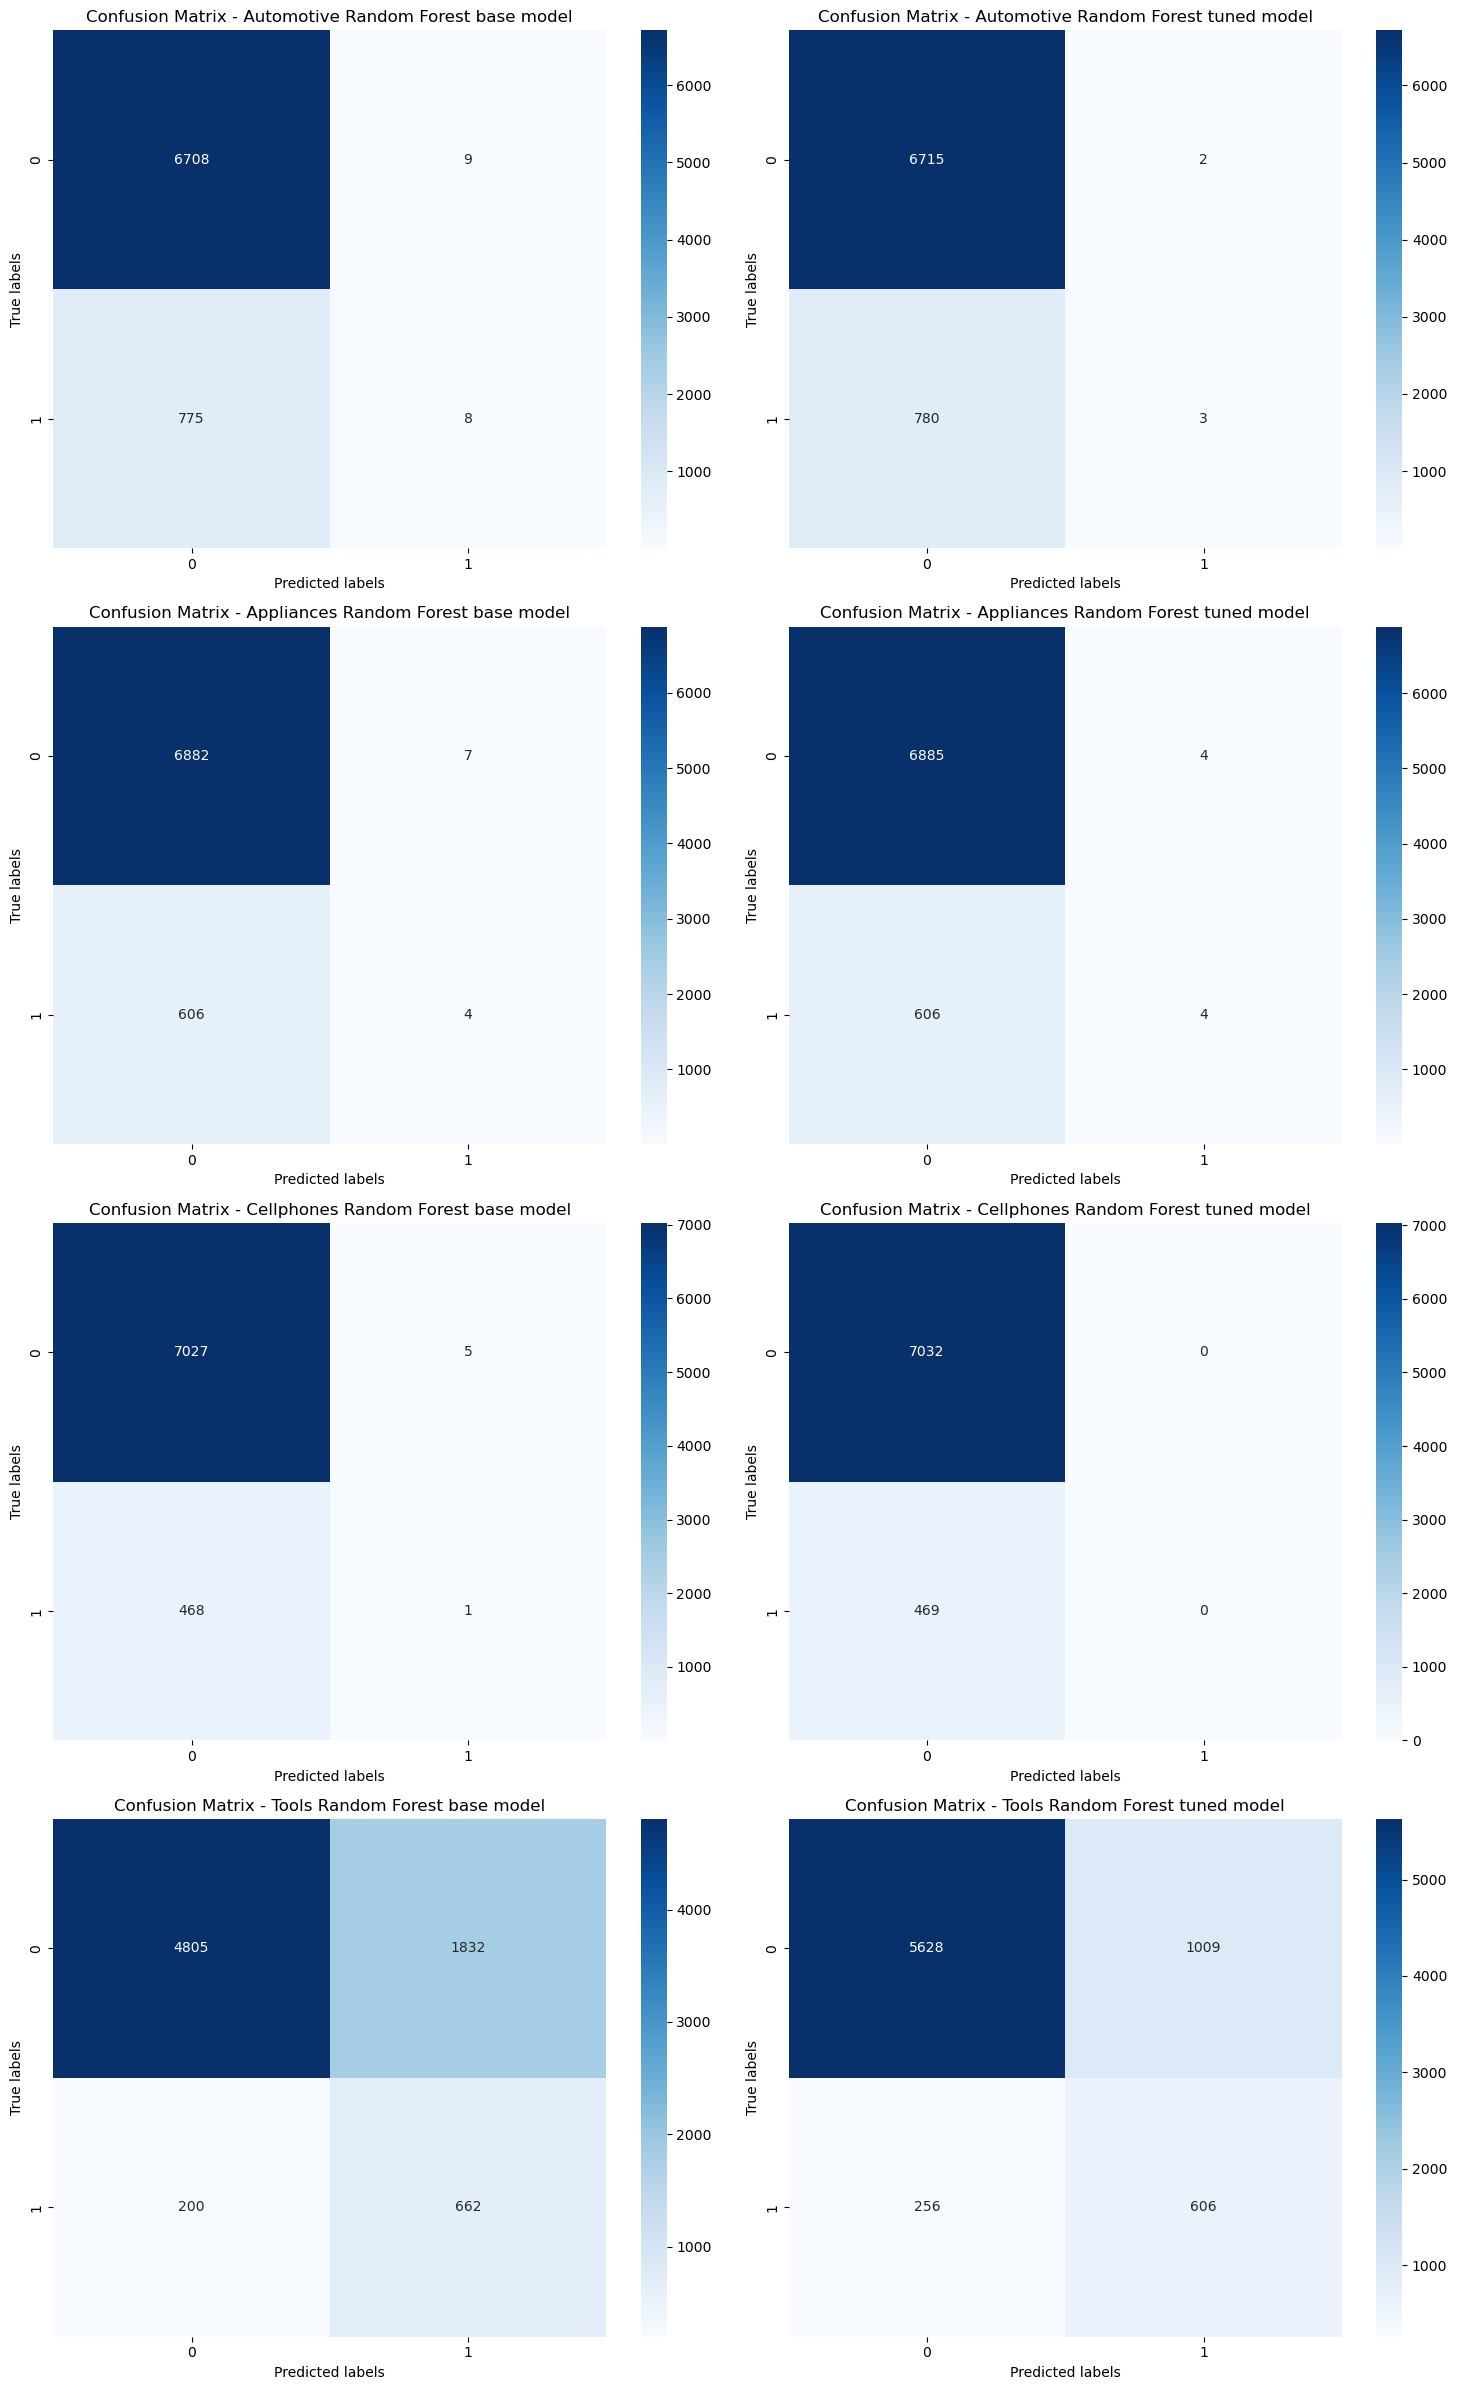

In [ ]:
# Defining dictionaries for Random Forest
models_rf = {
    "Automotive Random Forest base model": rf_base_classifier_automotive,
    "Automotive Random Forest tuned model": rf_tuned_classifier_automotive,
    "Appliances Random Forest base model": rf_base_classifier_appliances,
    "Appliances Random Forest tuned model": rf_tuned_classifier_appliances,
    "Cellphones Random Forest base model": rf_base_classifier_cell,
    "Cellphones Random Forest tuned model": rf_tuned_classifier_cell,
    "Tools Random Forest base model": rf_base_classifier_tools,
    "Tools Random Forest tuned model": rf_tuned_classifier_tools,

}

datasets_rf = {
    "Automotive Random Forest base model": (X_test_auto, y_test_auto),
    "Automotive Random Forest tuned model": (X_test_auto, y_test_auto),
    "Appliances Random Forest base model": (X_test_app, y_test_app),
    "Appliances Random Forest tuned model": (X_test_app, y_test_app),
    "Cellphones Random Forest base model": (X_test_cell, y_test_cell),
    "Cellphones Random Forest tuned model": (X_test_cell, y_test_cell),
    "Tools Random Forest base model": (X_test_tools, y_test_tools),
    "Tools Random Forest tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for Random Forest
evaluate_models_with_confusion_matrix(models_rf, datasets_rf)

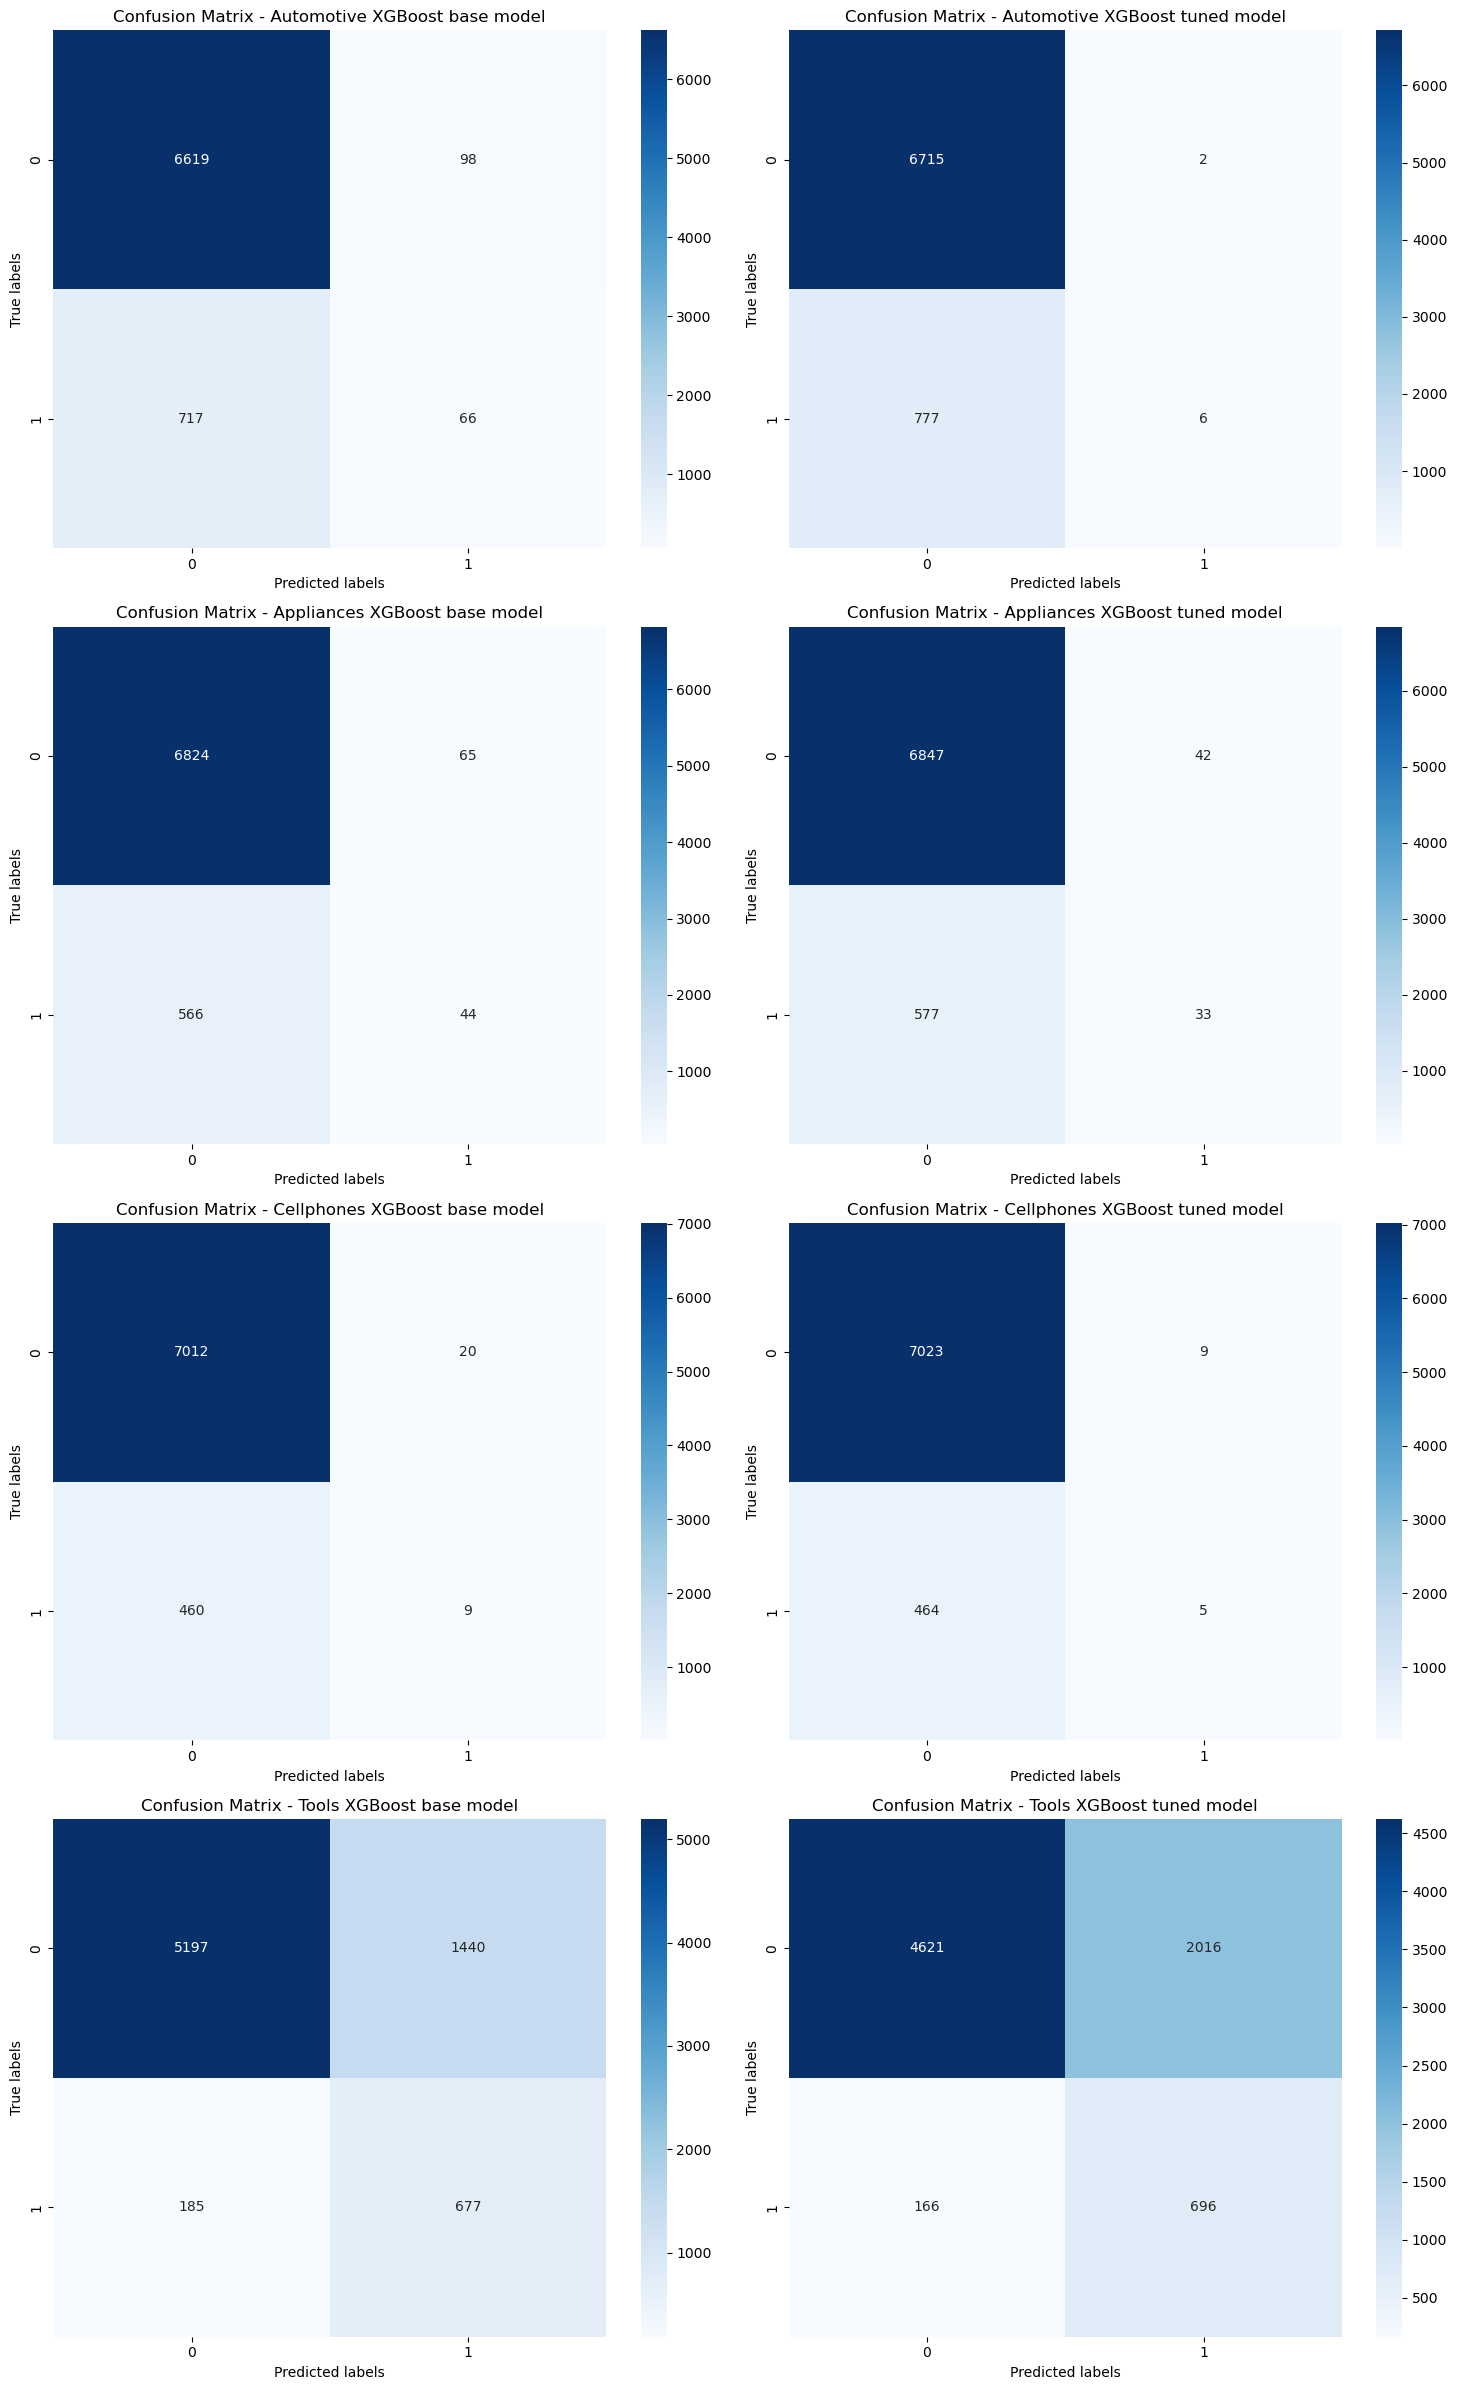

In [ ]:
# Defining dictionaries for XGBoost
models_xgb = {
    "Automotive XGBoost base model": xgb_base_classifier_automotive,
    "Automotive XGBoost tuned model": xgb_tuned_classifier_automotive,
    "Appliances XGBoost base model": xgb_base_classifier_appliances,
    "Appliances XGBoost tuned model": xgb_tuned_classifier_appliances,
    "Cellphones XGBoost base model": xgb_base_classifier_cell,
    "Cellphones XGBoost tuned model": xgb_tuned_classifier_cell,
    "Tools XGBoost base model": xgb_base_classifier_tools,
    "Tools XGBoost tuned model": xgb_tuned_classifier_tools,

}

datasets_xgb = {
    "Automotive XGBoost base model": (X_test_auto, y_test_auto),
    "Automotive XGBoost tuned model": (X_test_auto, y_test_auto),
    "Appliances XGBoost base model": (X_test_app, y_test_app),
    "Appliances XGBoost tuned model": (X_test_app, y_test_app),
    "Cellphones XGBoost base model": (X_test_cell, y_test_cell),
    "Cellphones XGBoost tuned model": (X_test_cell, y_test_cell),
    "Tools XGBoost base model": (X_test_tools, y_test_tools),
    "Tools XGBoost tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for XGBoost
evaluate_models_with_confusion_matrix(models_xgb, datasets_xgb)

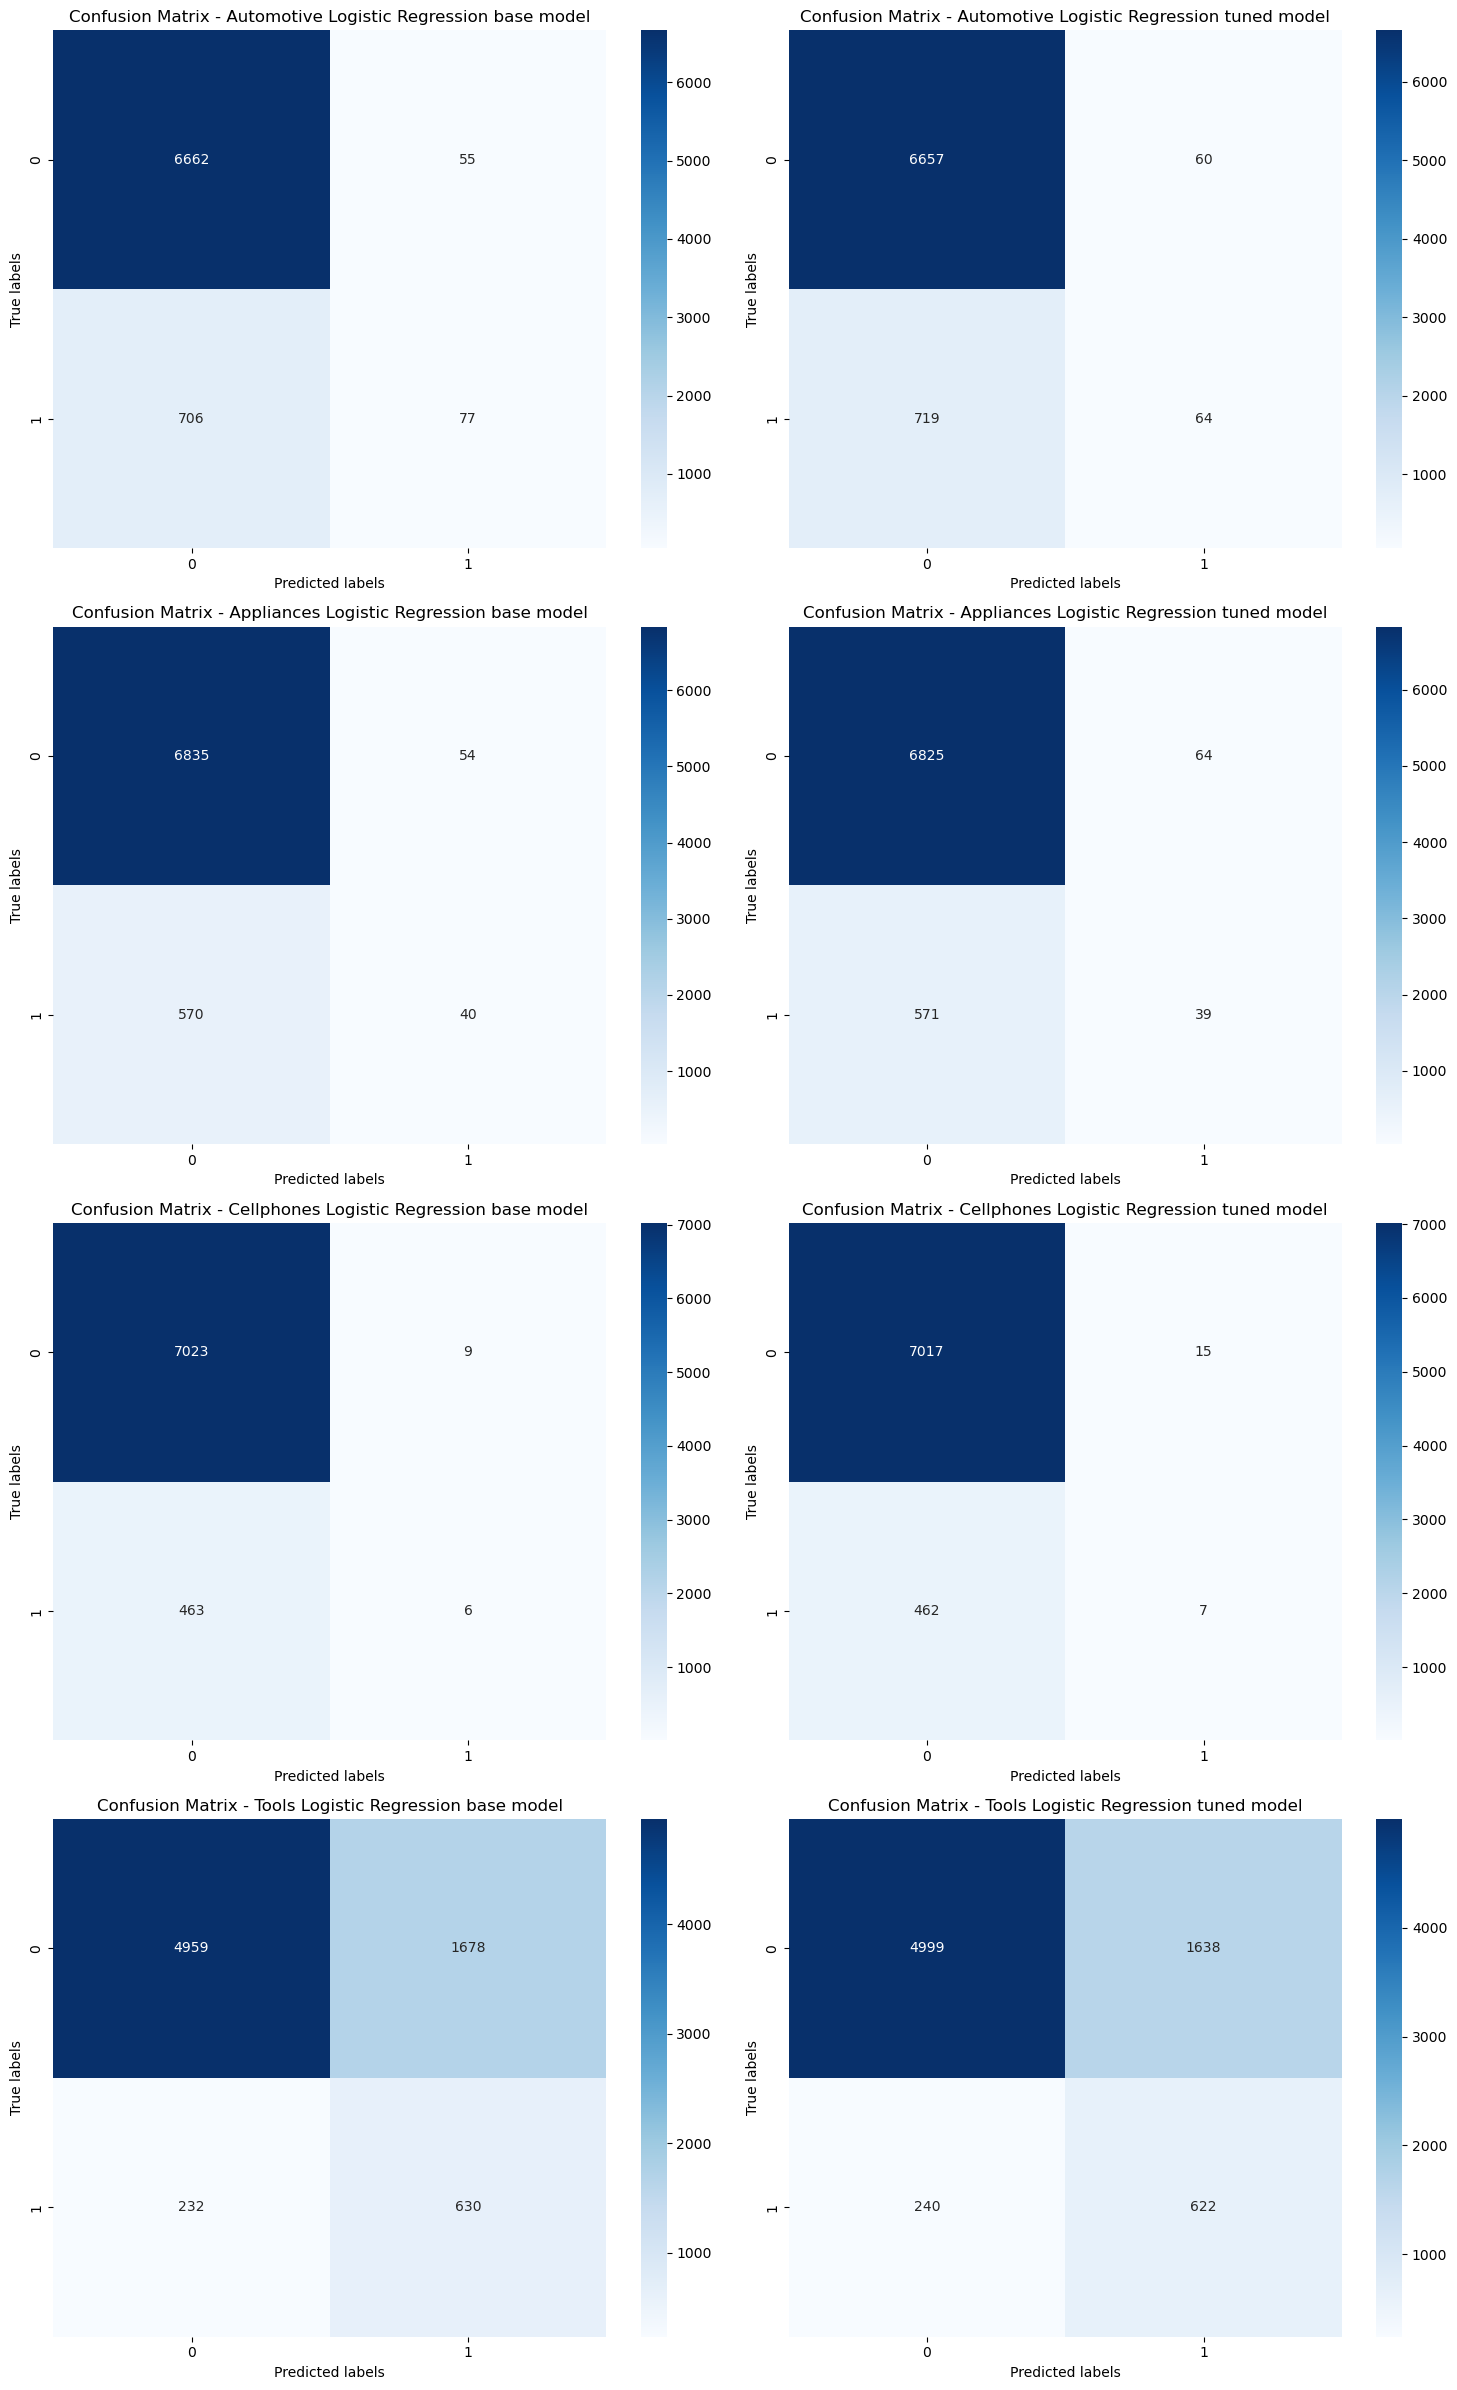

In [ ]:
# Defining dictionaries for logistic regression
models_lr = {
    "Automotive Logistic Regression base model": lr_base_classifier_automotive,
    "Automotive Logistic Regression tuned model": lr_tuned_classifier_automotive,
    "Appliances Logistic Regression base model": lr_base_classifier_appliances,
    "Appliances Logistic Regression tuned model": lr_tuned_classifier_appliances,
    "Cellphones Logistic Regression base model": lr_base_classifier_cell,
    "Cellphones Logistic Regression tuned model": lr_tuned_classifier_cell,
    "Tools Logistic Regression base model": lr_base_classifier_tools,
    "Tools Logistic Regression tuned model": lr_tuned_classifier_tools,

}

datasets_lr = {
    "Automotive Logistic Regression base model": (X_test_auto, y_test_auto),
    "Automotive Logistic Regression tuned model": (X_test_auto, y_test_auto),
    "Appliances Logistic Regression base model": (X_test_app, y_test_app),
    "Appliances Logistic Regression tuned model": (X_test_app, y_test_app),
    "Cellphones Logistic Regression base model": (X_test_cell, y_test_cell),
    "Cellphones Logistic Regression tuned model": (X_test_cell, y_test_cell),
    "Tools Logistic Regression base model": (X_test_tools, y_test_tools),
    "Tools Logistic Regression tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for Logistic Regression
evaluate_models_with_confusion_matrix(models_lr, datasets_lr)

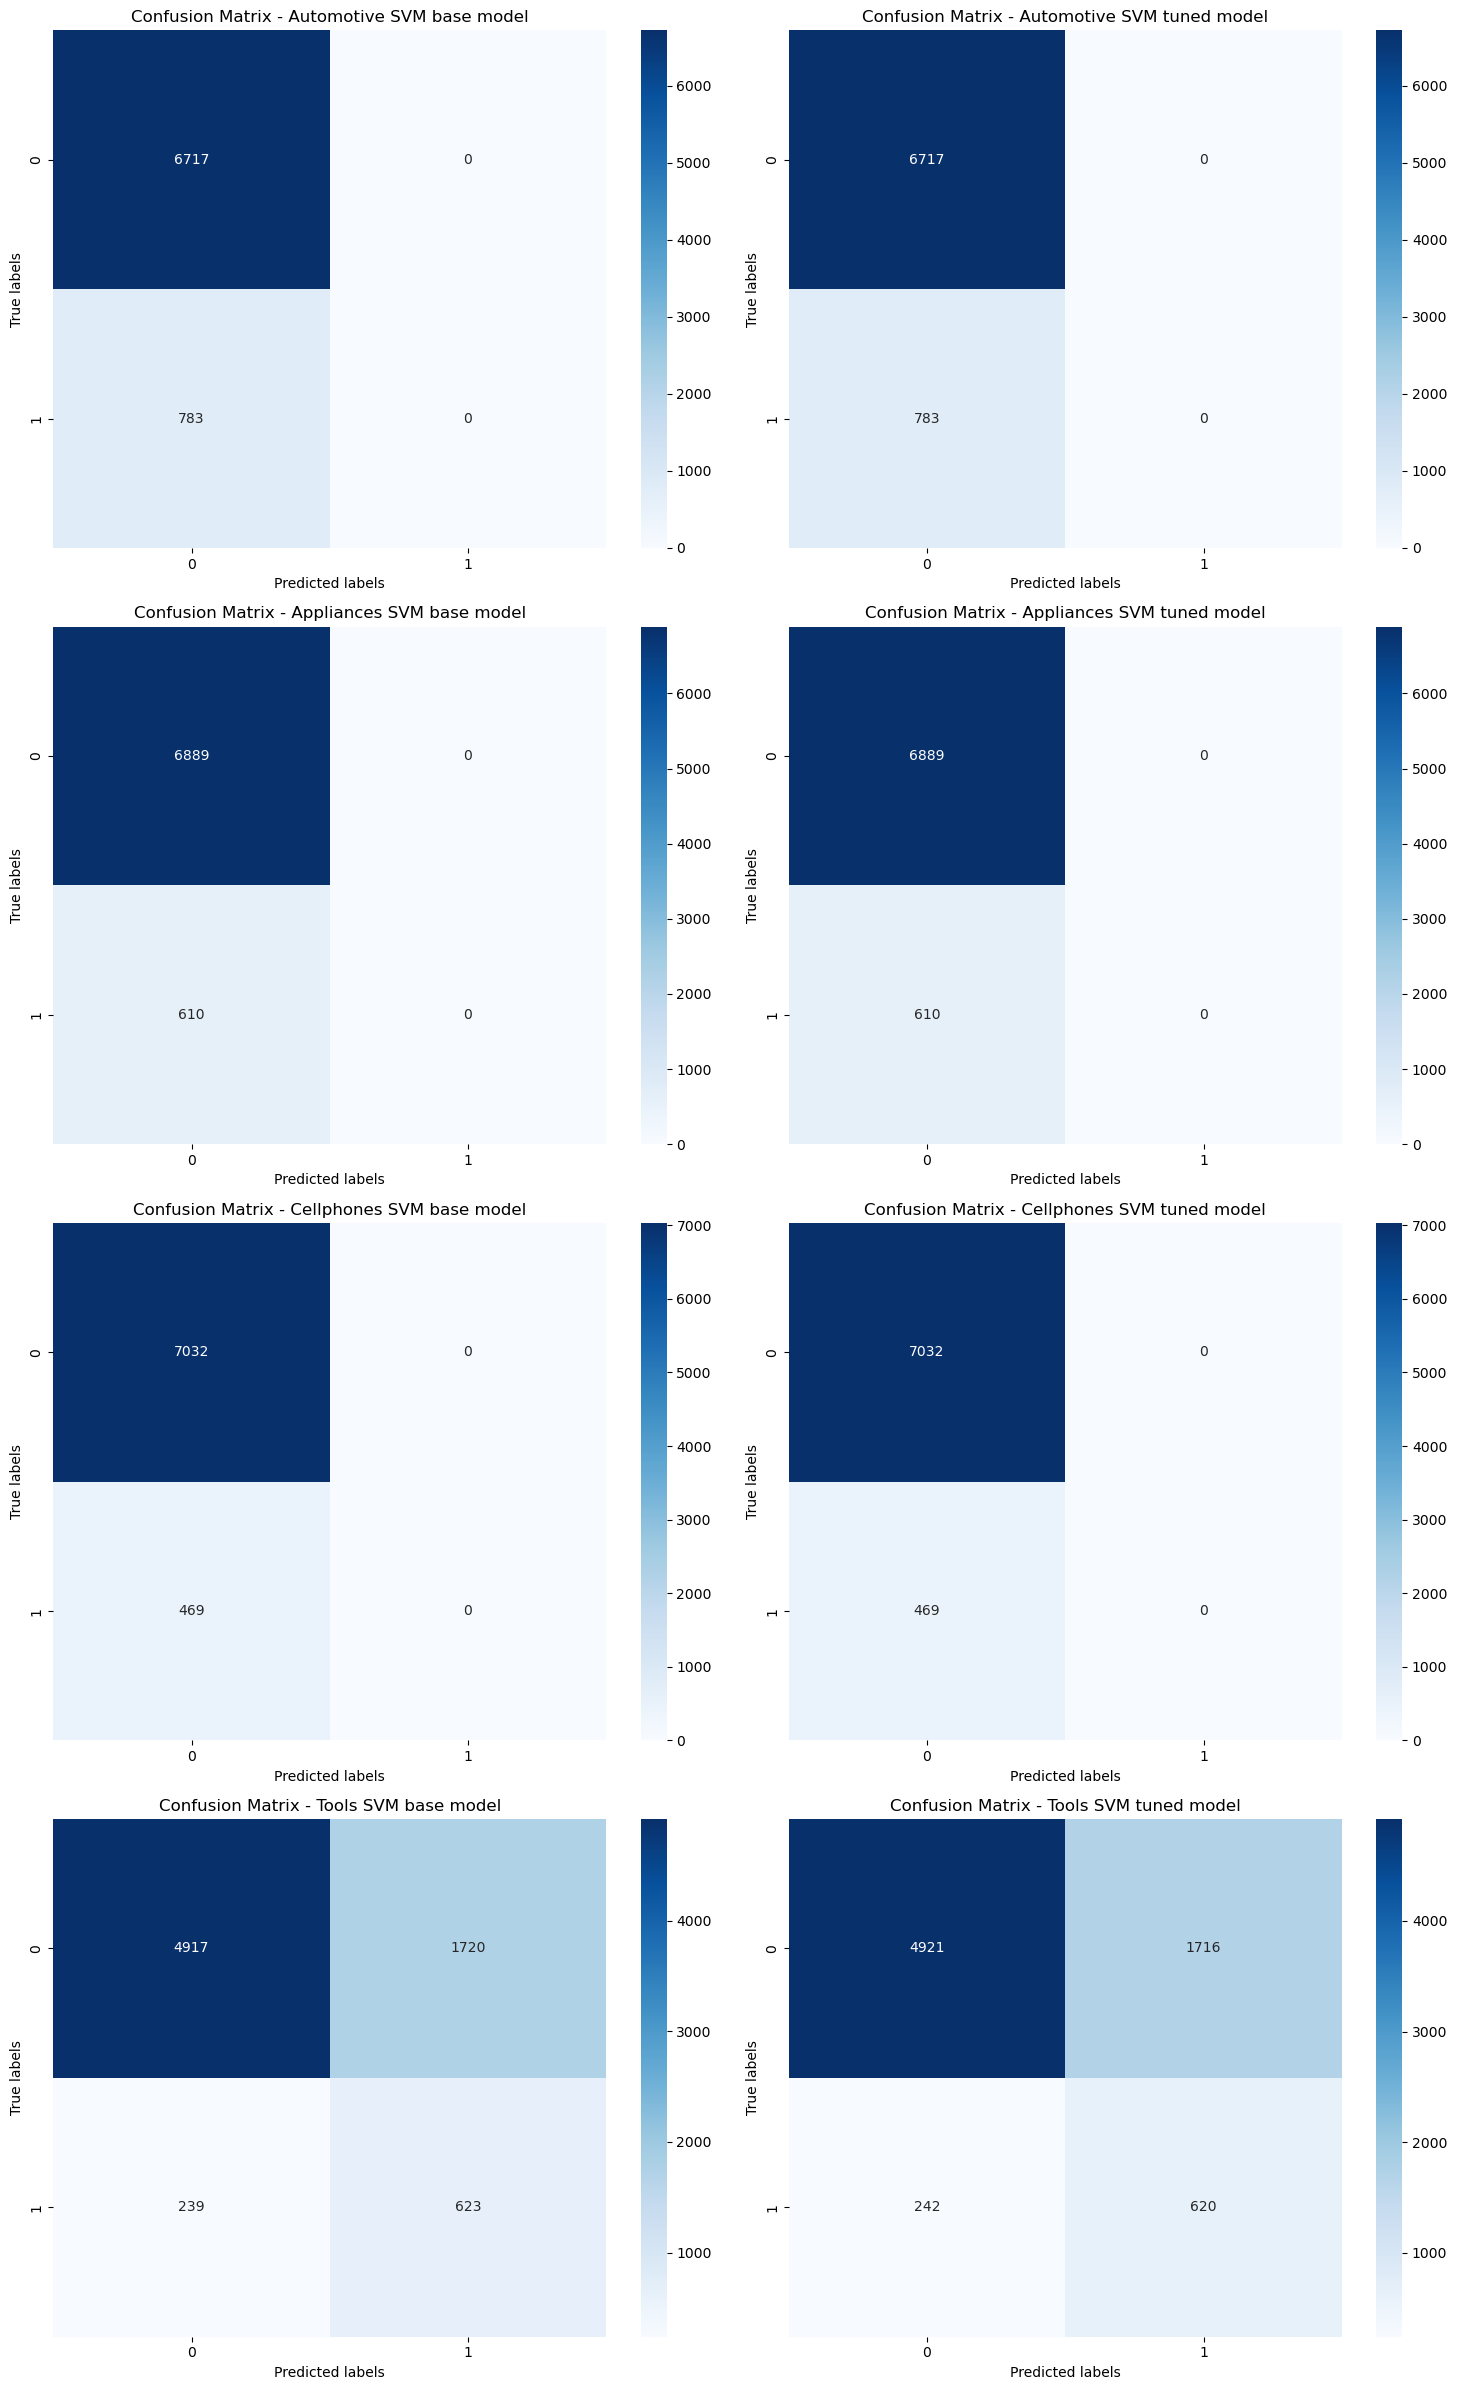

In [ ]:
# Defining dictionaries for SVM
models_svm = {
    "Automotive SVM base model": svm_base_classifier_automotive,
    "Automotive SVM tuned model": svm_tuned_classifier_automotive,
    "Appliances SVM base model": svm_base_classifier_appliances,
    "Appliances SVM tuned model": svm_tuned_classifier_appliances,
    "Cellphones SVM base model": svm_base_classifier_cell,
    "Cellphones SVM tuned model": svm_tuned_classifier_cell,
    "Tools SVM base model": svm_base_classifier_tools,
    "Tools SVM tuned model": svm_tuned_classifier_tools,

}

datasets_svm = {
    "Automotive SVM base model": (X_test_auto, y_test_auto),
    "Automotive SVM tuned model": (X_test_auto, y_test_auto),
    "Appliances SVM base model": (X_test_app, y_test_app),
    "Appliances SVM tuned model": (X_test_app, y_test_app),
    "Cellphones SVM base model": (X_test_cell, y_test_cell),
    "Cellphones SVM tuned model": (X_test_cell, y_test_cell),
    "Tools SVM base model": (X_test_tools, y_test_tools),
    "Tools SVM tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for SVM
evaluate_models_with_confusion_matrix(models_svm, datasets_svm)

In [ ]:
from tabulate import tabulate
def evaluate_models_with_metrics(models, datasets):
    num_models = len(models)
    ncols = 2  # 2 columns, can change as required
    nrows = -(-num_models // ncols)  # Ceiling division to calculate number of rows
    table_data = []

    for idx, (model_name, model) in enumerate(models.items()):
        row = idx // ncols
        col = idx % ncols

        X_test, y_test = datasets[model_name]
        y_pred = model.predict(X_test)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred)

        # F1-Score
        f1 = f1_score(y_test, y_pred)

        # Area under ROC curve
        roc_auc = auc(fpr, tpr)

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Precision
        precision = precision_score(y_test, y_pred, zero_division=1)

        # Recall
        recall = recall_score(y_test, y_pred)

        #print()

        # TPR and FPR
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        tpr = tpr[1]
        fpr = fpr[1]

        table_data.append([model_name, accuracy, precision, recall, f1, roc_auc, tpr, fpr])

    table_headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'TPR', 'FPR']
    print(tabulate(table_data, table_headers))

In [ ]:
# Defining dictionaries for SVM
models_svm = {
    "Automotive SVM base model": svm_base_classifier_automotive,
    "Automotive SVM tuned model": svm_tuned_classifier_automotive,
    "Appliances SVM base model": svm_base_classifier_appliances,
    "Appliances SVM tuned model": svm_tuned_classifier_appliances,
    "Cellphones SVM base model": svm_base_classifier_cell,
    "Cellphones SVM tuned model": svm_tuned_classifier_cell,
    "Tools SVM base model": svm_base_classifier_tools,
    "Tools SVM tuned model": svm_tuned_classifier_tools,

}

datasets_svm = {
    "Automotive SVM base model": (X_test_auto, y_test_auto),
    "Automotive SVM tuned model": (X_test_auto, y_test_auto),
    "Appliances SVM base model": (X_test_app, y_test_app),
    "Appliances SVM tuned model": (X_test_app, y_test_app),
    "Cellphones SVM base model": (X_test_cell, y_test_cell),
    "Cellphones SVM tuned model": (X_test_cell, y_test_cell),
    "Tools SVM base model": (X_test_tools, y_test_tools),
    "Tools SVM tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for SVM
evaluate_models_with_metrics(models_svm, datasets_svm)

Model                         Accuracy    Precision    Recall    F1-Score       AUC       TPR       FPR
--------------------------  ----------  -----------  --------  ----------  --------  --------  --------
Automotive SVM base model     0.8956       1         0           0         0.5       1         1
Automotive SVM tuned model    0.8956       1         0           0         0.5       1         1
Appliances SVM base model     0.918656     1         0           0         0.5       1         1
Appliances SVM tuned model    0.918656     1         0           0         0.5       1         1
Cellphones SVM base model     0.937475     1         0           0         0.5       1         1
Cellphones SVM tuned model    0.937475     1         0           0         0.5       1         1
Tools SVM base model          0.738765     0.265898  0.722738    0.388768  0.731792  0.722738  0.259153
Tools SVM tuned model         0.738899     0.265411  0.719258    0.387742  0.730353  0.719258  0.258551


In [ ]:
# Defining dictionaries for logistic regression
models_lr = {
    "Automotive Logistic Regression base model": lr_base_classifier_automotive,
    "Automotive Logistic Regression tuned model": lr_tuned_classifier_automotive,
    "Appliances Logistic Regression base model": lr_base_classifier_appliances,
    "Appliances Logistic Regression tuned model": lr_tuned_classifier_appliances,
    "Cellphones Logistic Regression base model": lr_base_classifier_cell,
    "Cellphones Logistic Regression tuned model": lr_tuned_classifier_cell,
    "Tools Logistic Regression base model": lr_base_classifier_tools,
    "Tools Logistic Regression tuned model": lr_tuned_classifier_tools,

}

datasets_lr = {
    "Automotive Logistic Regression base model": (X_test_auto, y_test_auto),
    "Automotive Logistic Regression tuned model": (X_test_auto, y_test_auto),
    "Appliances Logistic Regression base model": (X_test_app, y_test_app),
    "Appliances Logistic Regression tuned model": (X_test_app, y_test_app),
    "Cellphones Logistic Regression base model": (X_test_cell, y_test_cell),
    "Cellphones Logistic Regression tuned model": (X_test_cell, y_test_cell),
    "Tools Logistic Regression base model": (X_test_tools, y_test_tools),
    "Tools Logistic Regression tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for Logistic Regression
evaluate_models_with_metrics(models_lr, datasets_lr)

Model                                         Accuracy    Precision     Recall    F1-Score       AUC        TPR         FPR
------------------------------------------  ----------  -----------  ---------  ----------  --------  ---------  ----------
Automotive Logistic Regression base model     0.898533     0.583333  0.0983397   0.168306   0.545076  0.0983397  0.00818818
Automotive Logistic Regression tuned model    0.896133     0.516129  0.0817369   0.141125   0.536402  0.0817369  0.00893256
Appliances Logistic Regression base model     0.916789     0.425532  0.0655738   0.113636   0.528868  0.0655738  0.00783858
Appliances Logistic Regression tuned model    0.915322     0.378641  0.0639344   0.109397   0.527322  0.0639344  0.00929017
Cellphones Logistic Regression base model     0.937075     0.4       0.0127932   0.0247934  0.505757  0.0127932  0.00127986
Cellphones Logistic Regression tuned model    0.936408     0.318182  0.0149254   0.0285132  0.506396  0.0149254  0.00213311
Tools Lo

In [ ]:
# Defining dictionaries for XGBoost
models_xgb = {
    "Automotive XGBoost base model": xgb_base_classifier_automotive,
    "Automotive XGBoost tuned model": xgb_tuned_classifier_automotive,
    "Appliances XGBoost base model": xgb_base_classifier_appliances,
    "Appliances XGBoost tuned model": xgb_tuned_classifier_appliances,
    "Cellphones XGBoost base model": xgb_base_classifier_cell,
    "Cellphones XGBoost tuned model": xgb_tuned_classifier_cell,
    "Tools XGBoost base model": xgb_base_classifier_tools,
    "Tools XGBoost tuned model": xgb_tuned_classifier_tools,

}

datasets_xgb = {
    "Automotive XGBoost base model": (X_test_auto, y_test_auto),
    "Automotive XGBoost tuned model": (X_test_auto, y_test_auto),
    "Appliances XGBoost base model": (X_test_app, y_test_app),
    "Appliances XGBoost tuned model": (X_test_app, y_test_app),
    "Cellphones XGBoost base model": (X_test_cell, y_test_cell),
    "Cellphones XGBoost tuned model": (X_test_cell, y_test_cell),
    "Tools XGBoost base model": (X_test_tools, y_test_tools),
    "Tools XGBoost tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for XGBoost
evaluate_models_with_metrics(models_xgb, datasets_xgb)

Model                             Accuracy    Precision      Recall    F1-Score       AUC         TPR          FPR
------------------------------  ----------  -----------  ----------  ----------  --------  ----------  -----------
Automotive XGBoost base model     0.891333     0.402439  0.0842912    0.139388   0.534851  0.0842912   0.0145898
Automotive XGBoost tuned model    0.896133     0.75      0.00766284   0.0151707  0.503683  0.00766284  0.000297752
Appliances XGBoost base model     0.915855     0.40367   0.0721311    0.122392   0.531348  0.0721311   0.00943533
Appliances XGBoost tuned model    0.917456     0.44      0.0540984    0.0963504  0.524001  0.0540984   0.00609668
Cellphones XGBoost base model     0.936009     0.310345  0.0191898    0.0361446  0.508173  0.0191898   0.00284414
Cellphones XGBoost tuned model    0.936942     0.357143  0.010661     0.0207039  0.504691  0.010661    0.00127986
Tools XGBoost base model          0.783304     0.319792  0.785383     0.454515   0.784

In [ ]:
# Defining dictionaries for Random Forest
models_rf = {
    "Automotive Random Forest base model": rf_base_classifier_automotive,
    "Automotive Random Forest tuned model": rf_tuned_classifier_automotive,
    "Appliances Random Forest base model": rf_base_classifier_appliances,
    "Appliances Random Forest tuned model": rf_tuned_classifier_appliances,
    "Cellphones Random Forest base model": rf_base_classifier_cell,
    "Cellphones Random Forest tuned model": rf_tuned_classifier_cell,
    "Tools Random Forest base model": rf_base_classifier_tools,
    "Tools Random Forest tuned model": rf_tuned_classifier_tools,

}

datasets_rf = {
    "Automotive Random Forest base model": (X_test_auto, y_test_auto),
    "Automotive Random Forest tuned model": (X_test_auto, y_test_auto),
    "Appliances Random Forest base model": (X_test_app, y_test_app),
    "Appliances Random Forest tuned model": (X_test_app, y_test_app),
    "Cellphones Random Forest base model": (X_test_cell, y_test_cell),
    "Cellphones Random Forest tuned model": (X_test_cell, y_test_cell),
    "Tools Random Forest base model": (X_test_tools, y_test_tools),
    "Tools Random Forest tuned model": (X_test_tools, y_test_tools),
}

# Running the function to get pair plots across categories for Random Forest
evaluate_models_with_metrics(models_rf, datasets_rf)

Model                                   Accuracy    Precision      Recall    F1-Score       AUC         TPR          FPR
------------------------------------  ----------  -----------  ----------  ----------  --------  ----------  -----------
Automotive Random Forest base model     0.895467     0.470588  0.0102171   0.02        0.504439  0.0102171   0.00133988
Automotive Random Forest tuned model    0.895733     0.6       0.00383142  0.00761421  0.501767  0.00383142  0.000297752
Appliances Random Forest base model     0.918256     0.363636  0.00655738  0.0128824   0.502771  0.00655738  0.00101611
Appliances Random Forest tuned model    0.918656     0.5       0.00655738  0.012945    0.502988  0.00655738  0.000580636
Cellphones Random Forest base model     0.936942     0.166667  0.0021322   0.00421053  0.500711  0.0021322   0.000711035
Cellphones Random Forest tuned model    0.937475     1         0           0           0.5       1           1
Tools Random Forest base model          0.72